# Problem Statement - Part I

## House Price Prediction Assignment
### Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
Essentially the company wants :

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dtm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 1. Reading and Understanding Data

#### 1.1 Data Volume

In [2]:
# Load the data
pd.set_option("display.max_columns", None)
df_house = pd.read_csv('train.csv')

In [3]:
# Checking the row and column counts
print("No. of rows = ", df_house.shape[0], "and no. of columns = ", df_house.shape[1])
print("Here is some sample records from top and bottom...")
# Print first 5 rows and last 5 rows
df_house.head(5).append(df_house.tail(5))

No. of rows =  1460 and no. of columns =  81
Here is some sample records from top and bottom...


C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\2772489774.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_house.head(5).append(df_house.tail(5))


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA  

#### 1.2 Columns and their data types

In [4]:
#Print all the columns and their data types
print(df_house.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Count all data types of all columns
print(df_house.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64


#### 1.3 Numeric and Categorical Columns

In [6]:
# Filter Numeric and Categorical Columns
numeric_columns = list(df_house.select_dtypes(exclude='object'))
categorical_columns = list(df_house.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numeric columns length: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 

### 2. Data Cleaning

#### 2.1 Fixing rows and columns

In [7]:
df_house[numeric_columns].describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
# Delete unidentified, irrelevant categorical columns base on schema description on each column and extrem unique values
df_house.drop(columns=['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True)

In [9]:
# Filter Numeric vs Categorical Columns again
numeric_columns = [df_house.select_dtypes(exclude='object').columns]
categorical_columns = [df_house.select_dtypes(include='object').columns]
print("categorical columns length: " + str(len(categorical_columns[0])))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns[0])))
print(numeric_columns)

categorical columns length: 43
[Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')]
numeric columns length: 34
[Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath

In [10]:
# Check duplicated rows
duplicated_rows = df_house.duplicated().value_counts()
df_number_of_duplicated_rows = pd.DataFrame(dict({"duplicated": duplicated_rows.index, "no_rows": duplicated_rows.values}))
print(df_number_of_duplicated_rows)

   duplicated  no_rows
0       False     1460


<font color=red>Results: we saw above results, the dataset did not have any duplicated rows because the dataset has 1460 rows and equal to 1460 rows of False duplicated column.</font>

#### 2.2 Treating missing values

In [11]:
# Filter all categorical columns where there are NA values
nan_categorical_columns = df_house[categorical_columns[0]].columns[df_house[categorical_columns[0]].isna().sum() > 0]
print(nan_categorical_columns)

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')


In [12]:
# Convert all NA values of categorical columns to None values rely on definition data file.
# As definition file mentions that the all categorical columns have NA values that means None values or No values.
for col in nan_categorical_columns:
    df_house[col].fillna(value='None', inplace=True)

In [13]:
# # Filter all numeric columns where there are NA values
count_nan_columns = (df_house[numeric_columns[0]].isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))
print("Columns that has null values: ")
print(df_house[numeric_columns[0]].columns[df_house[numeric_columns[0]].isnull().sum() > 0])

No of columns that has null values: 2
Columns that has null values: 
Index(['LotFrontage', 'MasVnrArea'], dtype='object')


In [14]:
# Filter all numeric columns where there are NA values
count_nan_columns = (df_house[numeric_columns[0]].isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))
print("Columns that has null values: ")
print(df_house[numeric_columns[0]].columns[df_house[numeric_columns[0]].isnull().sum() > 0])

No of columns that has null values: 2
Columns that has null values: 
Index(['LotFrontage', 'MasVnrArea'], dtype='object')


In [15]:
# Filter all null columns have row length which equal to row length of data set 
df_house.columns[df_house.isnull().sum() == len(df_house.index)]

Index([], dtype='object')

In [16]:
# Check number of rows have NaN values on number of columns over a row
number_of_nan_rows = df_house.isnull().sum(axis=1).sort_values(ascending=False).value_counts()
df_number_of_nan_rows = pd.DataFrame(dict({"no_columns": number_of_nan_rows.index, "no_rows": number_of_nan_rows.values}))
print(df_number_of_nan_rows)

   no_columns  no_rows
0           0     1195
1           1      263
2           2        2


In [17]:
# Remove row index is 0 because that is number of rows don't have any columns which contains NaN values
df_number_of_nan_rows.drop(index=0, inplace=True)

In [18]:
# Check the % missing values on number of columns over a row
print("Percentage of number of columns:")
df_number_of_nan_rows['percentage_of_columns_over_row'] = round(df_number_of_nan_rows.no_columns / len(df_house.columns) * 100, 3)
print(df_number_of_nan_rows[['no_columns', 'percentage_of_columns_over_row']])

Percentage of number of columns:
   no_columns  percentage_of_columns_over_row
1           1                           1.299
2           2                           2.597


##### Fill missing values for categorical columns

In [19]:
# Check empty values for categorical columns
df_house[categorical_columns[0]].empty

False

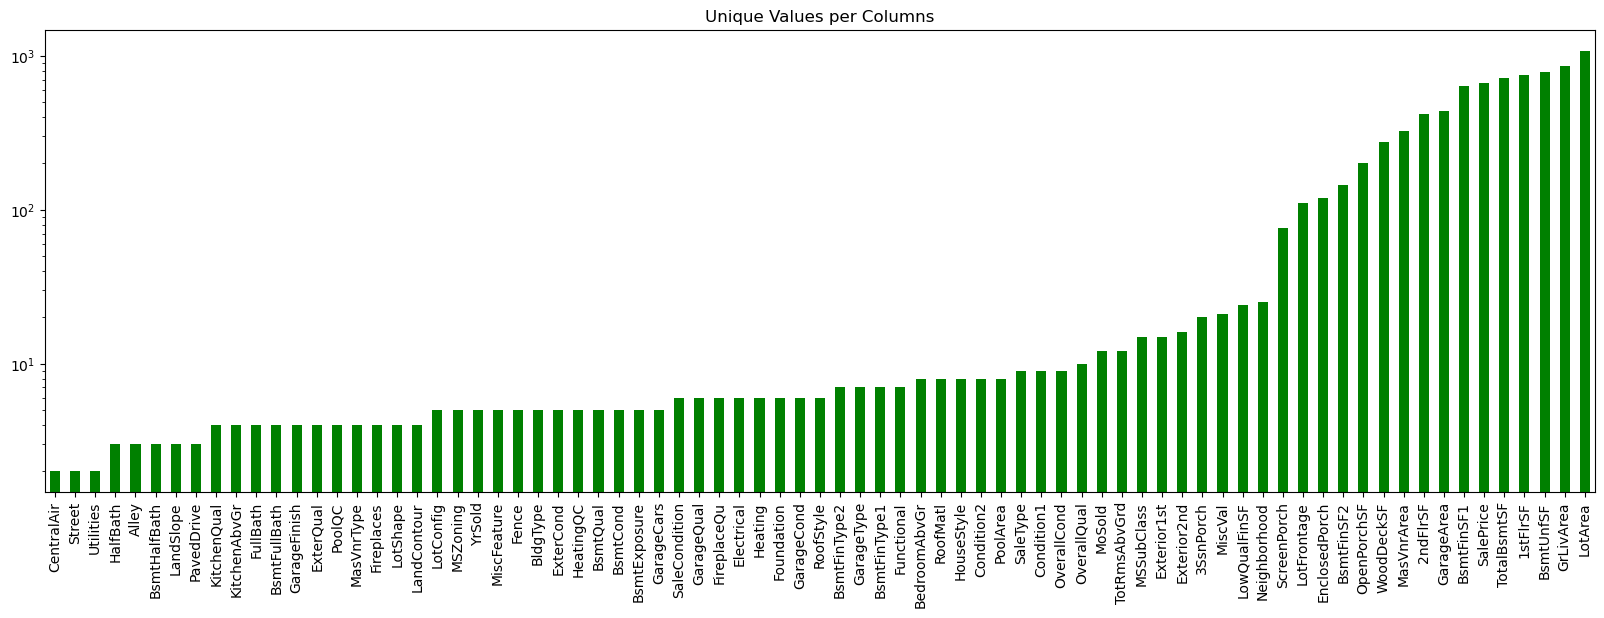

CentralAir          2
Street              2
Utilities           2
HalfBath            3
Alley               3
BsmtHalfBath        3
LandSlope           3
PavedDrive          3
KitchenQual         4
KitchenAbvGr        4
FullBath            4
BsmtFullBath        4
GarageFinish        4
ExterQual           4
PoolQC              4
MasVnrType          4
Fireplaces          4
LotShape            4
LandContour         4
LotConfig           5
MSZoning            5
YrSold              5
MiscFeature         5
Fence               5
BldgType            5
ExterCond           5
HeatingQC           5
BsmtQual            5
BsmtCond            5
BsmtExposure        5
GarageCars          5
SaleCondition       6
GarageQual          6
FireplaceQu         6
Electrical          6
Heating             6
Foundation          6
GarageCond          6
RoofStyle           6
BsmtFinType2        7
GarageType          7
BsmtFinType1        7
Functional          7
BedroomAbvGr        8
RoofMatl            8
HouseStyle

In [20]:
# For each numerical feature compute number of unique entries
unique_values = df_house.nunique().sort_values()

# Plot information with y-axis in log-scale
ax = unique_values.plot.bar(logy=True, figsize=(20, 6), title="Unique Values per Columns", color = "green")
plt.show()
# Print number of distinct elements in specified axis.
pd.set_option("display.max_rows", 1000)
print(unique_values)

As above plot and result, we have ordered categorical columns such as MoSold, YrSold, OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageQual, GarageCond, PoolQC columns

#### Standardising values

In [21]:
# Mapping MoSold column
import calendar
df_house['MoSold'] = df_house['MoSold'].apply(lambda x: calendar.month_abbr[x])
# Mapping YrSold column
df_house['YrSold'] = df_house['YrSold'].astype('str')

In [22]:
# Mapping OverallQual and OverallCond column
df_house['OverallQual'] = df_house['OverallQual'].map({10:'VeryExcellent',9:'Excellent', 8:'VeryGood',7:'Good',6: "AboveAverage",5: "Average",4: "BelowAverage", 3: "Fair", 2:"Poor", 1:"VeryPoor"})
df_house['OverallCond'] = df_house['OverallCond'].map({10:'VeryExcellent',9:'Excellent', 8:'VeryGood',7:'Good',6: "AboveAverage",5: "Average",4: "BelowAverage", 3: "Fair", 2:"Poor", 1:"VeryPoor"})

In [23]:
# Mapping MSSubClass column
df_house['MSSubClass'] = df_house['MSSubClass'].map({20: '1-STORY-1946', 30: '1-STORY-1945', 40: '1-STORY-FINISHED', 45: '1-1/2-STORY-UNFINISHED', 50: '1-1/2-STORY-FINISHED',
                                                     60: '2-STORY-1946', 70: '2-STORY-1945', 75: '2-1/2-STORY', 80: 'MULTI-LEVEL', 85: 'SPLIT-FOYER', 90: 'DUPLEX',
                                                     120: '1-STORY-PUD', 150: '1-1/2-STORY-PUD', 160: '2-STORY-PUD', 180: 'PUD-MULTILEVEL', 190: '2-FAMILY-CONVERSION'})

In [24]:
# Filter Numeric vs Categorical Columns again
numeric_columns = [df_house.select_dtypes(exclude='object').columns]
categorical_columns = [df_house.select_dtypes(include='object').columns]
print("categorical columns length: " + str(len(categorical_columns[0])))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns[0])))
print(numeric_columns)

categorical columns length: 48
[Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')]
numeric columns length: 29
[Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', '

##### Remove outliers

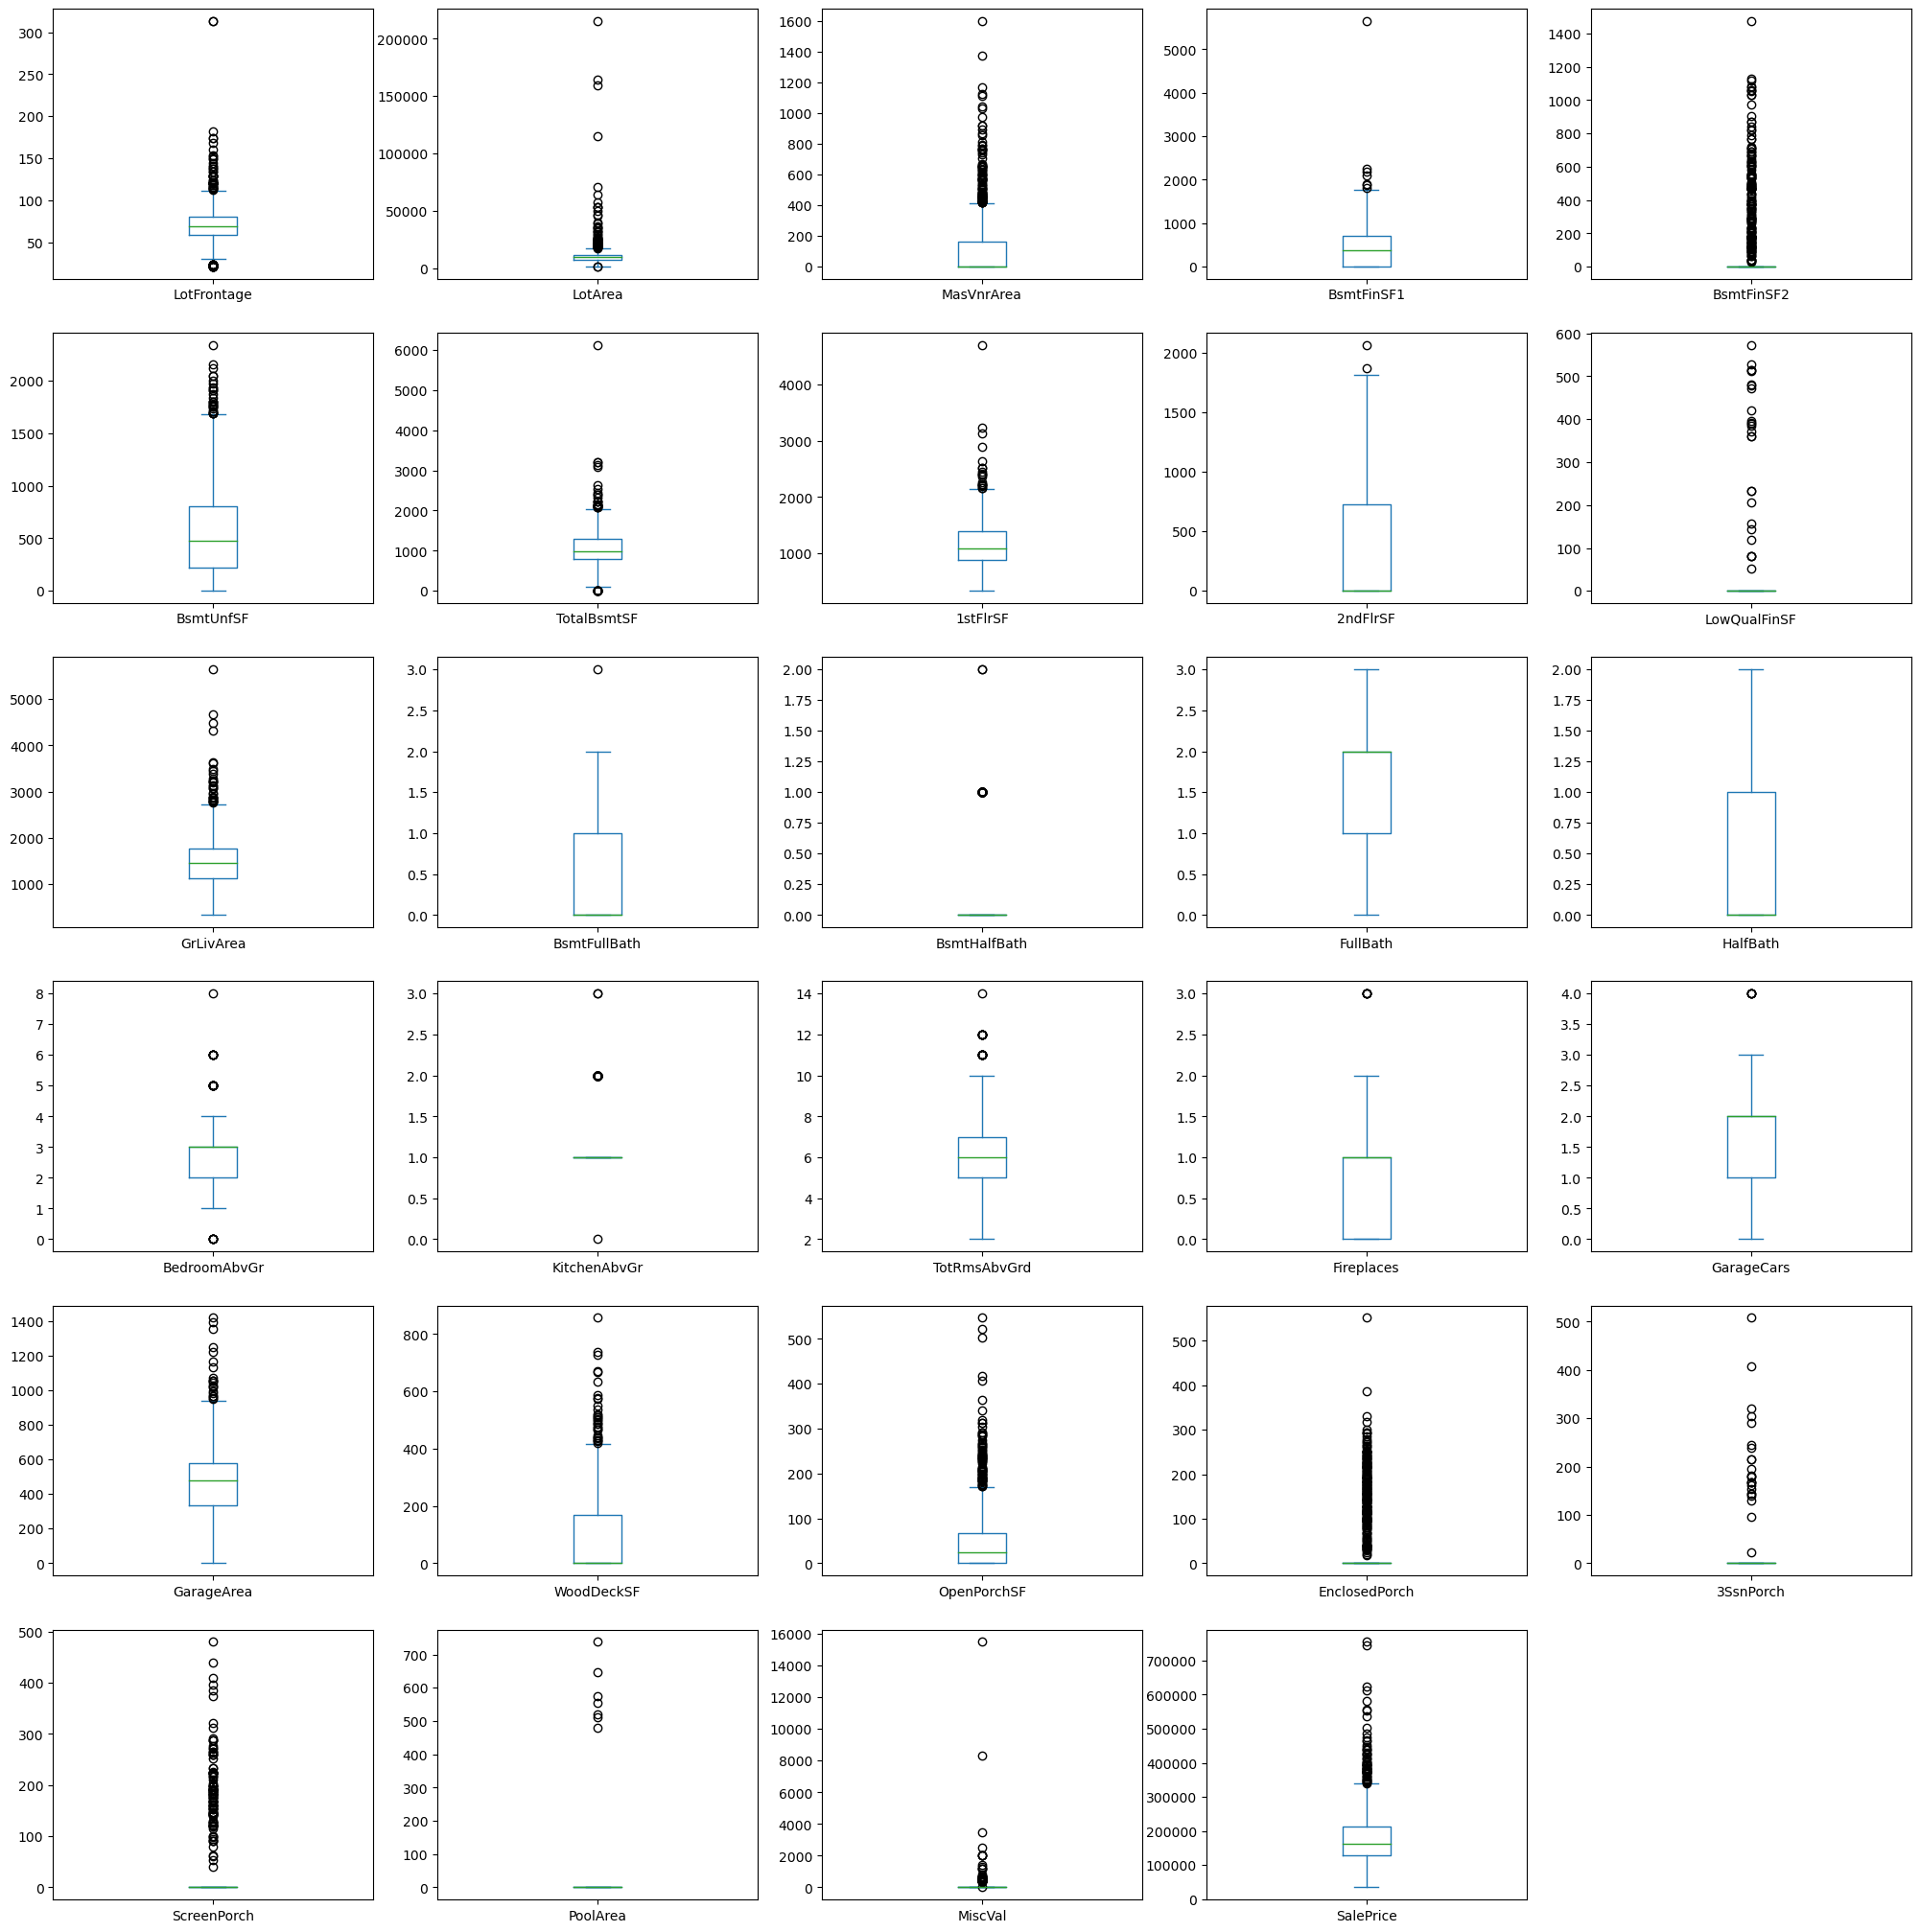

In [25]:
# Plot numeric variables to detect the outliers
plt.figure(figsize=(25,30))
ind = 1
for col in numeric_columns[0]:
    plt.subplot(7,5,ind)
    ind+=1
    df_house[col].plot.box()

plt.show()

In [26]:
# Remove the outliers for the variables which have lower outliers and upper outliers
for col in ['LotFrontage', 'LotArea', 'TotalBsmtSF']:
    quantiles = df_house[col].quantile([0.25,0.50,0.75,0.95,0.99])
    print(quantiles)
    iqr = quantiles[0.75] - quantiles[0.25]
    upper_limit_outlier = quantiles[0.75] + 1.5*iqr
    lower_limit_outlier = quantiles[0.25] - 1.5*iqr
    df_house = df_house[(df_house[col] <= upper_limit_outlier) & (df_house[col] >= lower_limit_outlier)]

# Remove the outliers for the variables which upper outliers
for col in ['MasVnrArea','1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']:
    quantiles = df_house[col].quantile([0.25,0.50,0.75,0.95,0.99])
    print(quantiles)
    iqr = quantiles[0.75] - quantiles[0.25]
    upper_limit_outlier = quantiles[0.75] + 1.5*iqr
    df_house = df_house[df_house[col] <= upper_limit_outlier]

0.25     59.0
0.50     69.0
0.75     80.0
0.95    107.0
0.99    141.0
Name: LotFrontage, dtype: float64
0.25     7599.0
0.50     9262.0
0.75    11100.0
0.95    15088.6
0.99    24754.0
Name: LotArea, dtype: float64
0.25     798.00
0.50     992.00
0.75    1276.50
0.95    1734.00
0.99    2112.86
Name: TotalBsmtSF, dtype: float64
0.25      0.0
0.50      0.0
0.75    148.0
0.95    423.0
0.99    747.4
Name: MasVnrArea, dtype: float64
0.25     874.00
0.50    1057.00
0.75    1320.00
0.95    1710.40
0.99    1929.92
Name: 1stFlrSF, dtype: float64
0.25    1116.5
0.50    1400.0
0.75    1710.0
0.95    2288.5
0.99    2720.0
Name: GrLivArea, dtype: float64
0.25    300.00
0.50    462.50
0.75    572.00
0.95    813.80
0.99    919.59
Name: GarageArea, dtype: float64
0.25    127000.0
0.50    153900.0
0.75    195400.0
0.95    285000.0
0.99    348600.0
Name: SalePrice, dtype: float64


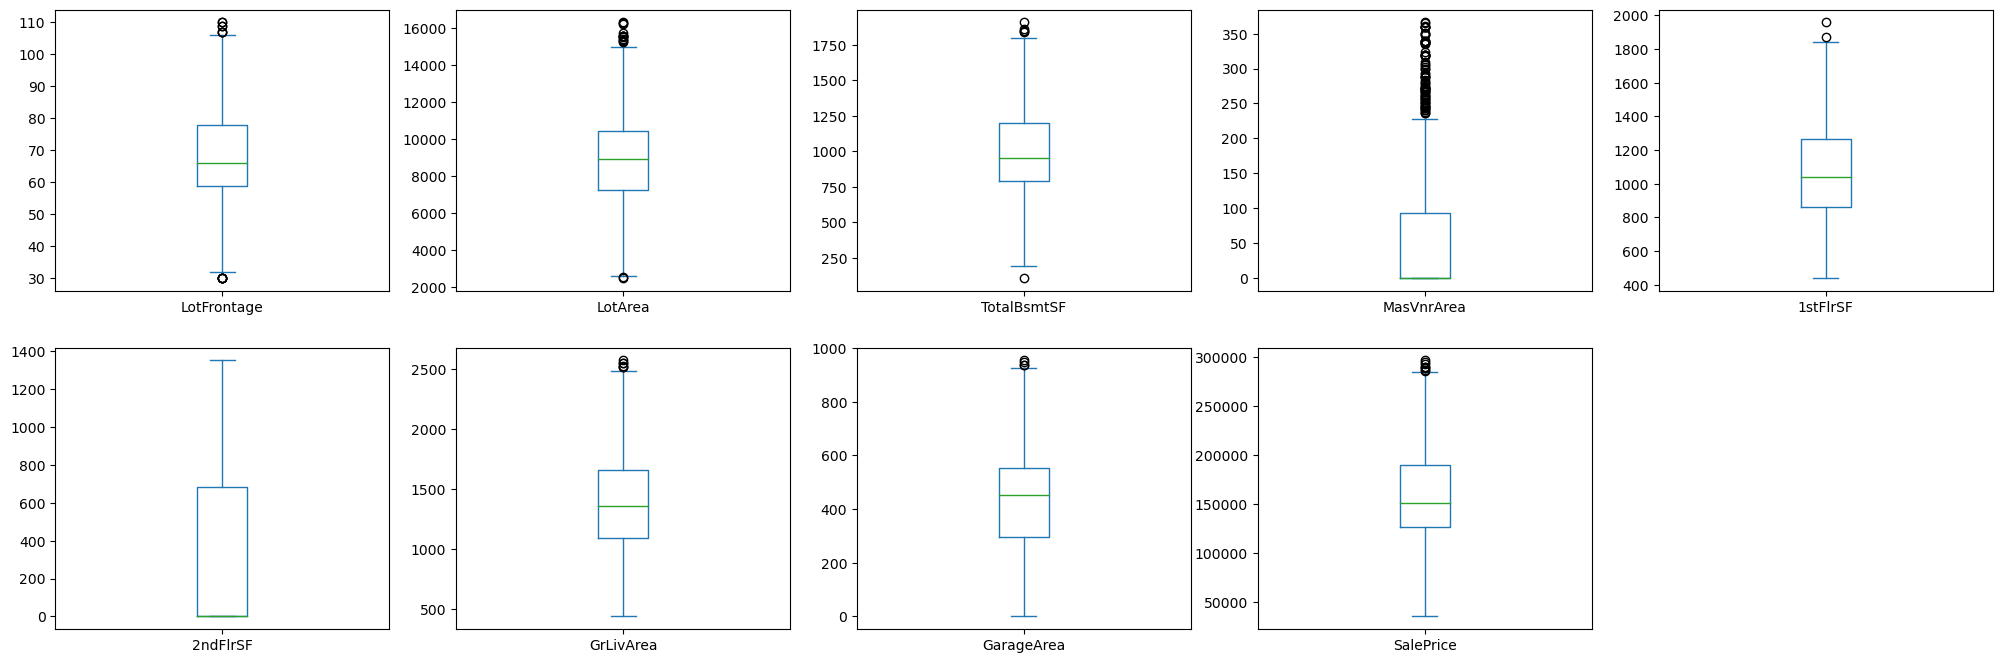

In [27]:
# Plot all numeric variables which removed outliers
plt.figure(figsize=(25,30))
ind = 1
for col in ['LotFrontage', 'LotArea', 'TotalBsmtSF', 'MasVnrArea','1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']:
    plt.subplot(7,5,ind)
    ind+=1
    df_house[col].plot.box()

plt.show()

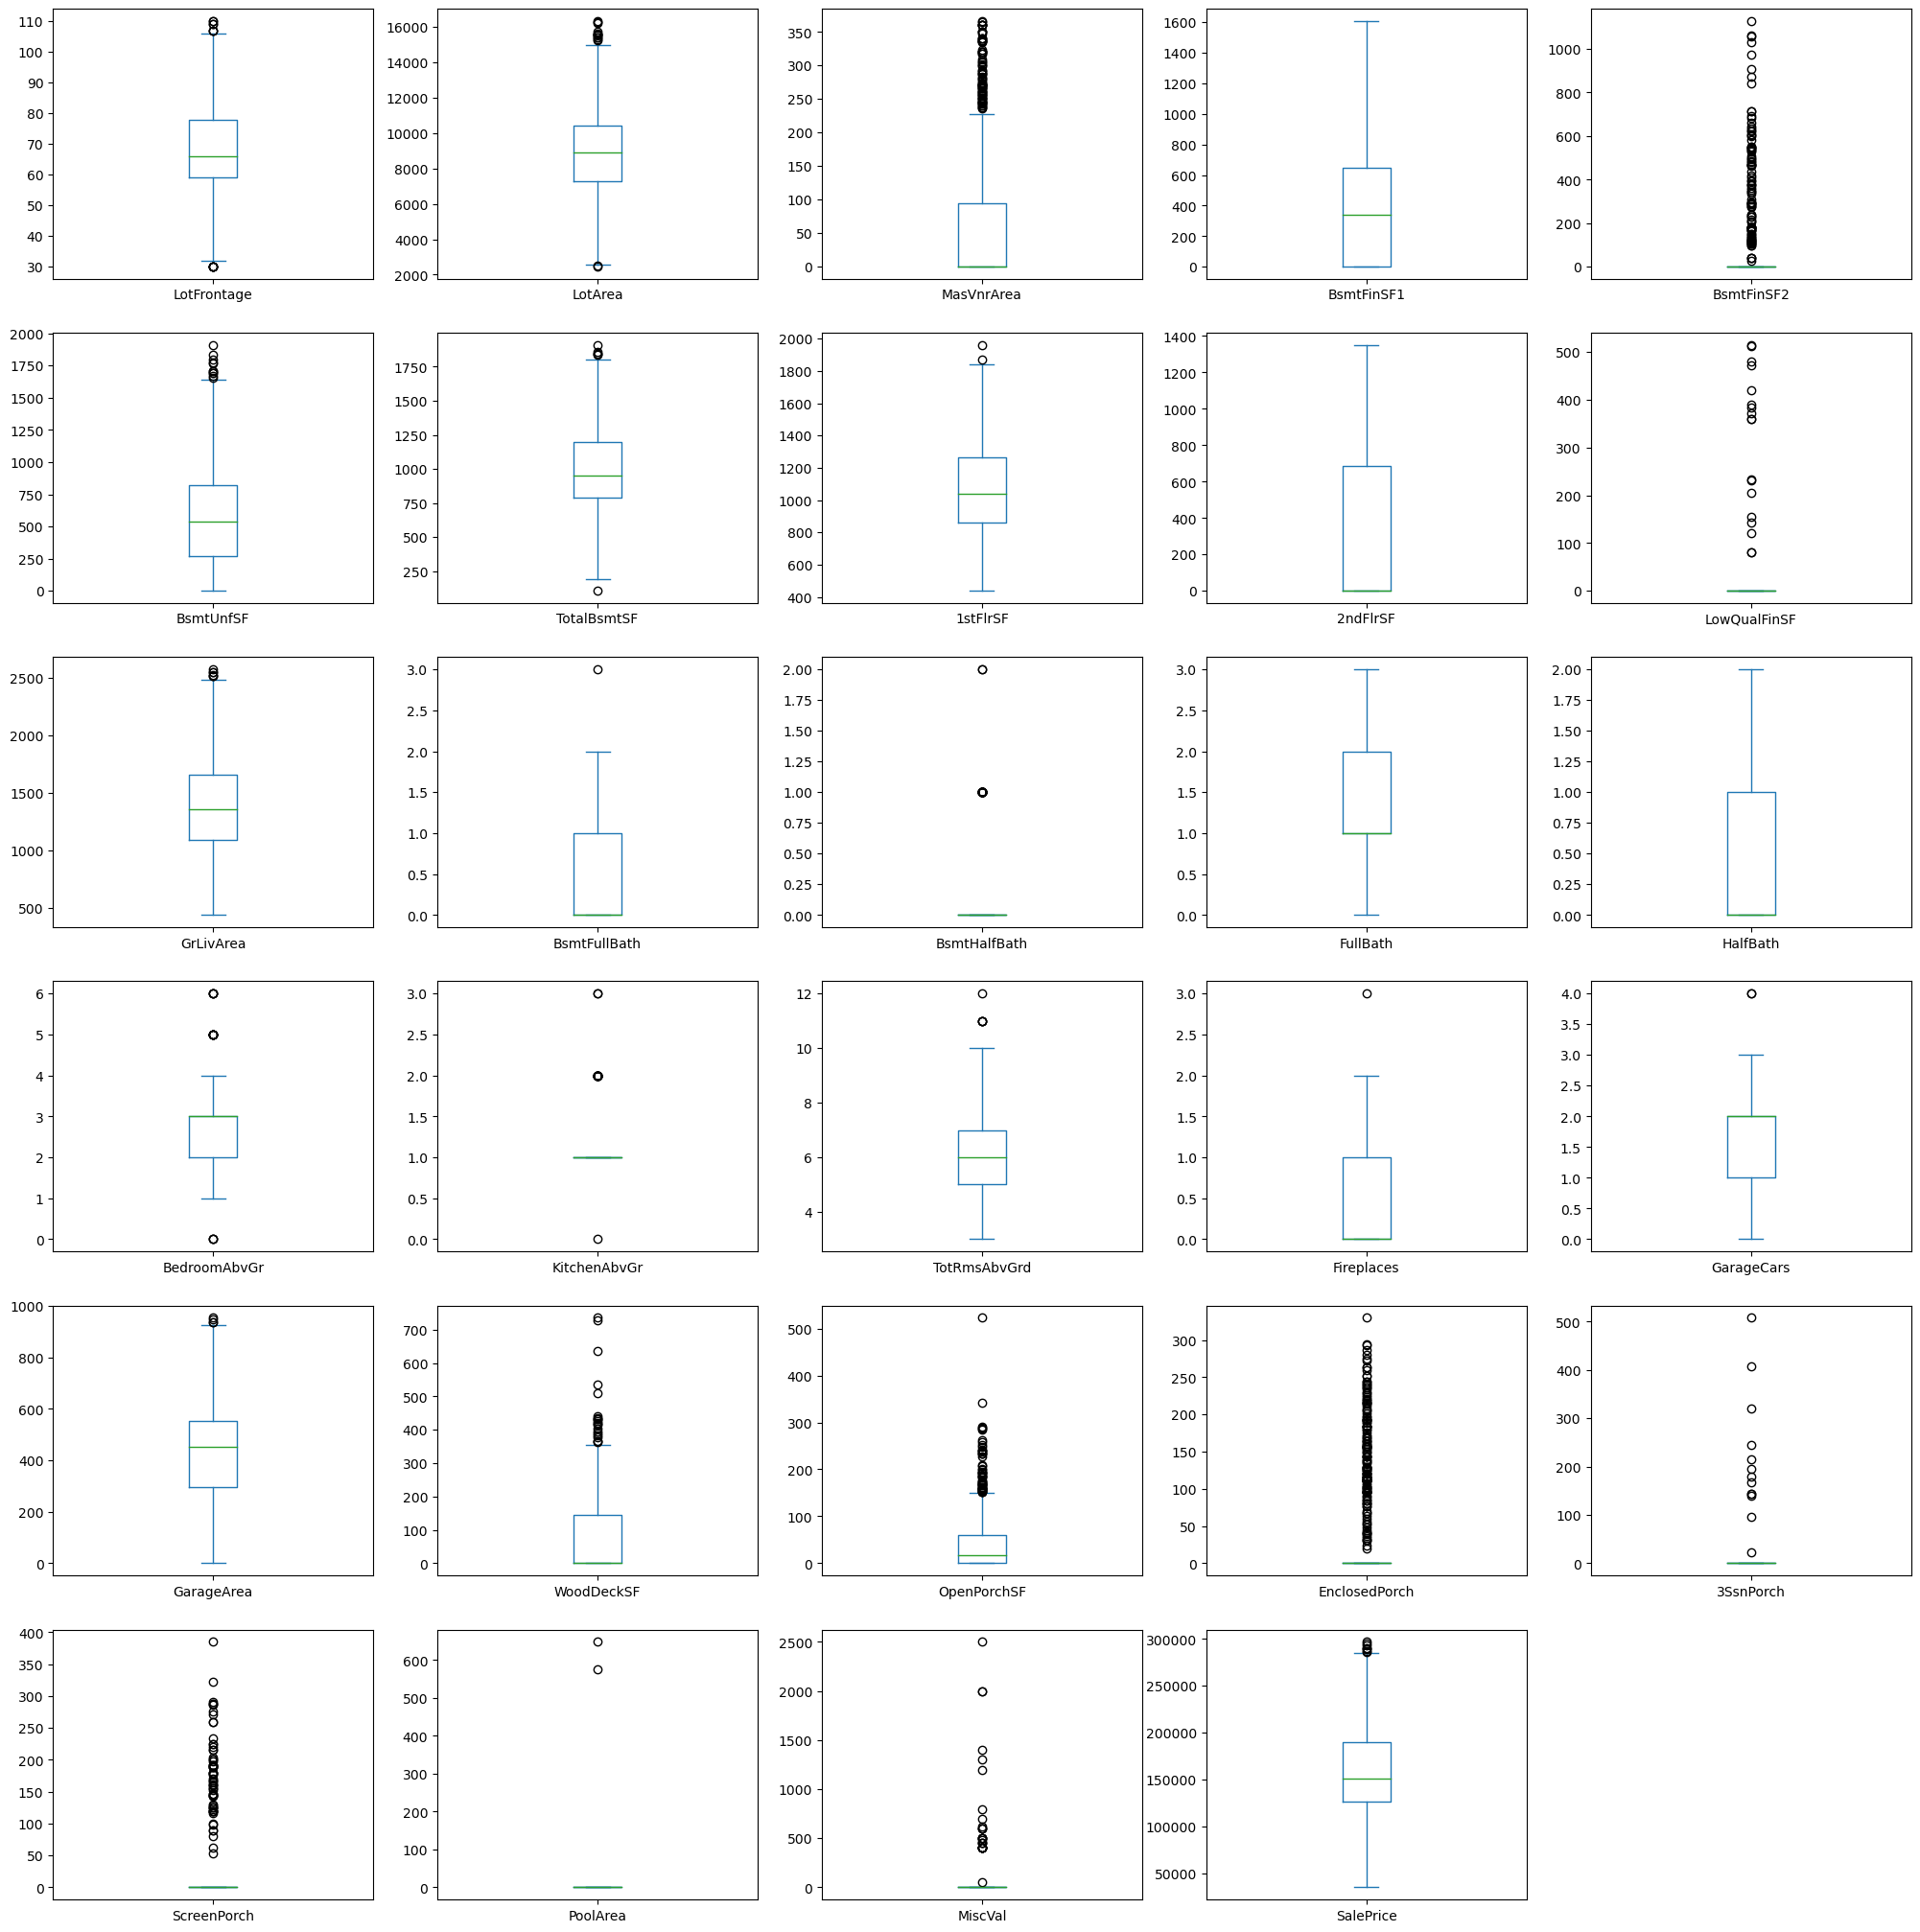

In [28]:
# Plot numeric variables to detect the outliers
plt.figure(figsize=(25,30))
ind = 1
for col in numeric_columns[0]:
    plt.subplot(7,5,ind)
    ind+=1
    df_house[col].plot.box()

plt.show()

In [29]:
# Filter again all numeric columns where there are NA values
count_nan_columns = (df_house.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))
print("Columns that has null values: ")
print(df_house.columns[df_house.isnull().sum() > 0])

No of columns that has null values: 0
Columns that has null values: 
Index([], dtype='object')


<font color='red'> As result above, we saw that the data set did not have any NA values and extrem values in data set.</font>

### Visualising and Analysis data

Visualising Numeric Variables

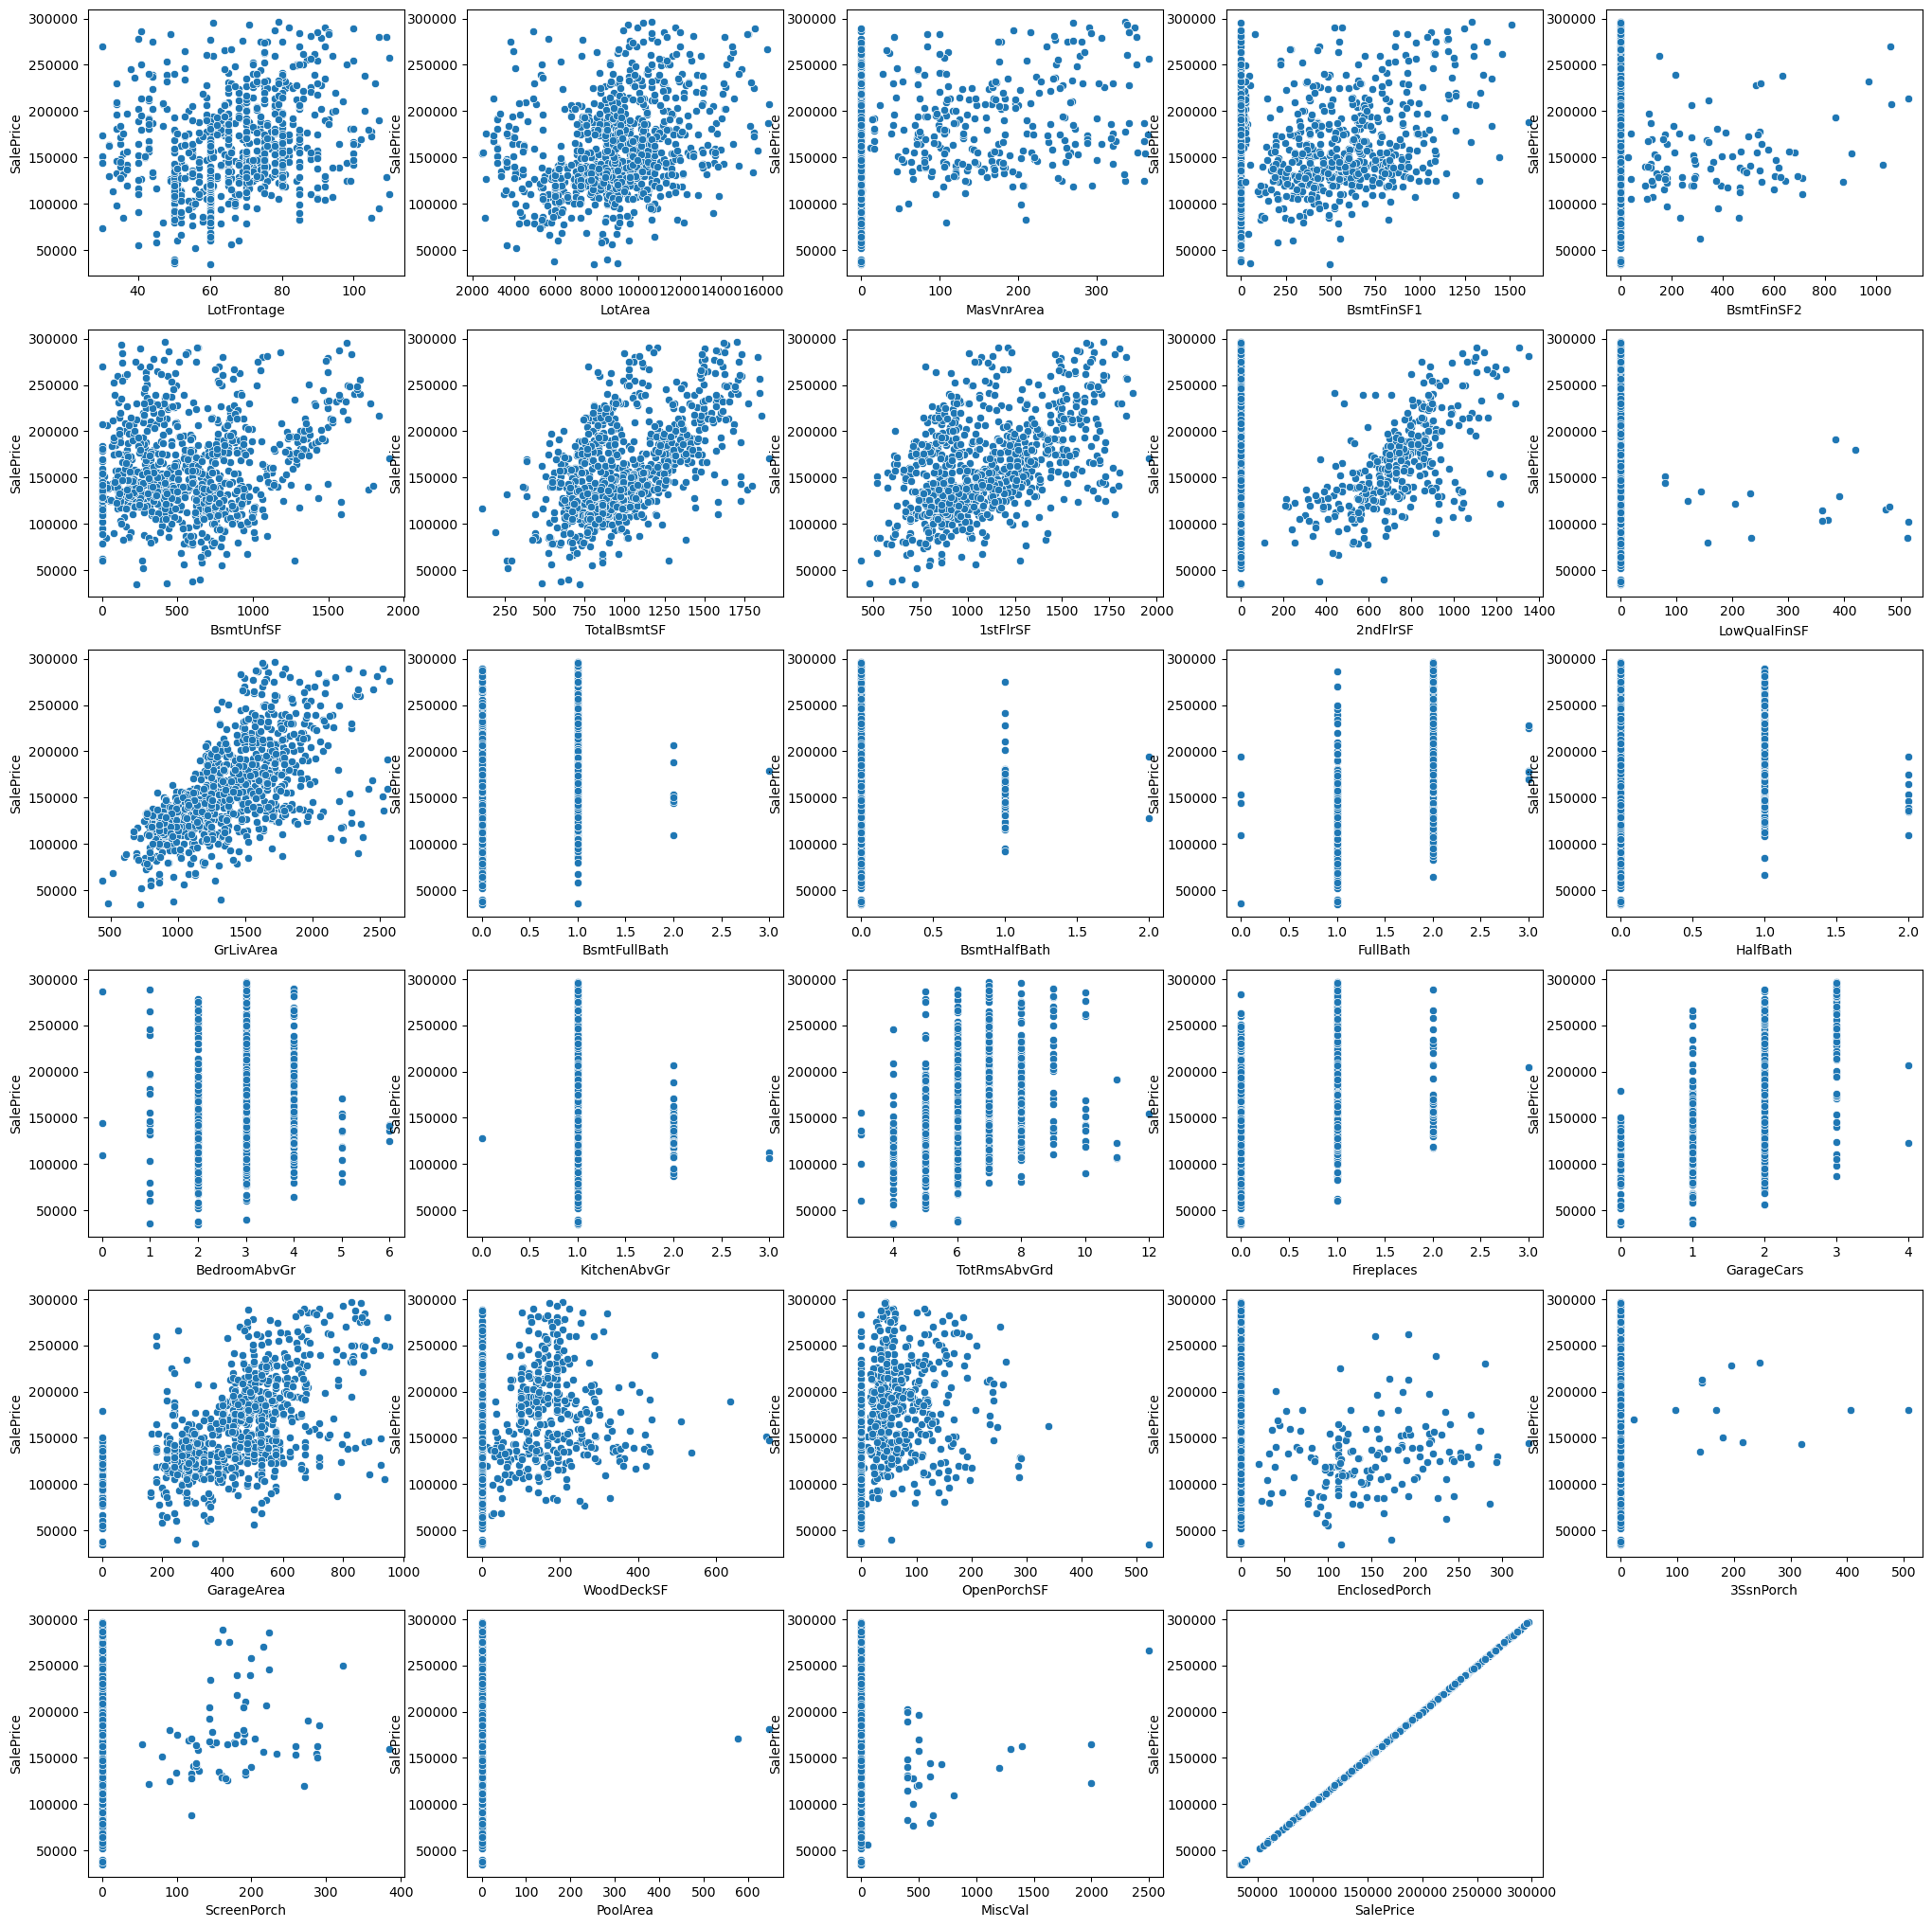

In [30]:
plt.figure(figsize=(25,30))
ind = 1
for col in numeric_columns[0]:
    plt.subplot(7,5,ind)
    ind+=1
    sns.scatterplot(data=df_house, x=col, y='SalePrice')

plt.show()

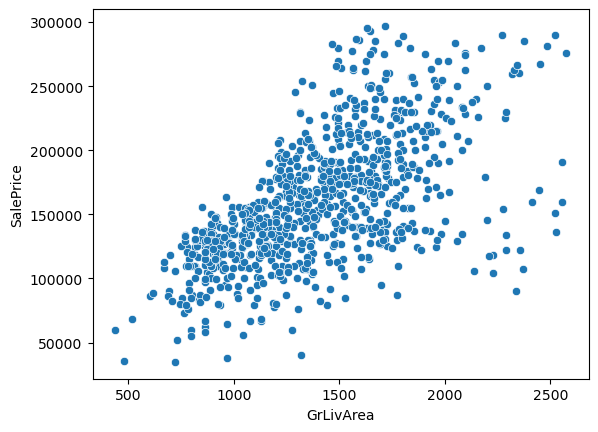

In [31]:
sns.scatterplot(data=df_house, x='GrLivArea', y='SalePrice')
plt.show()

As above plots, we see that `LotArea`, `BsmtFinSF1`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `GarageArea` variables can consider to be a Linear Pattern and can consider to make a linear model.

`GrLivArea` shows the strongest linearity

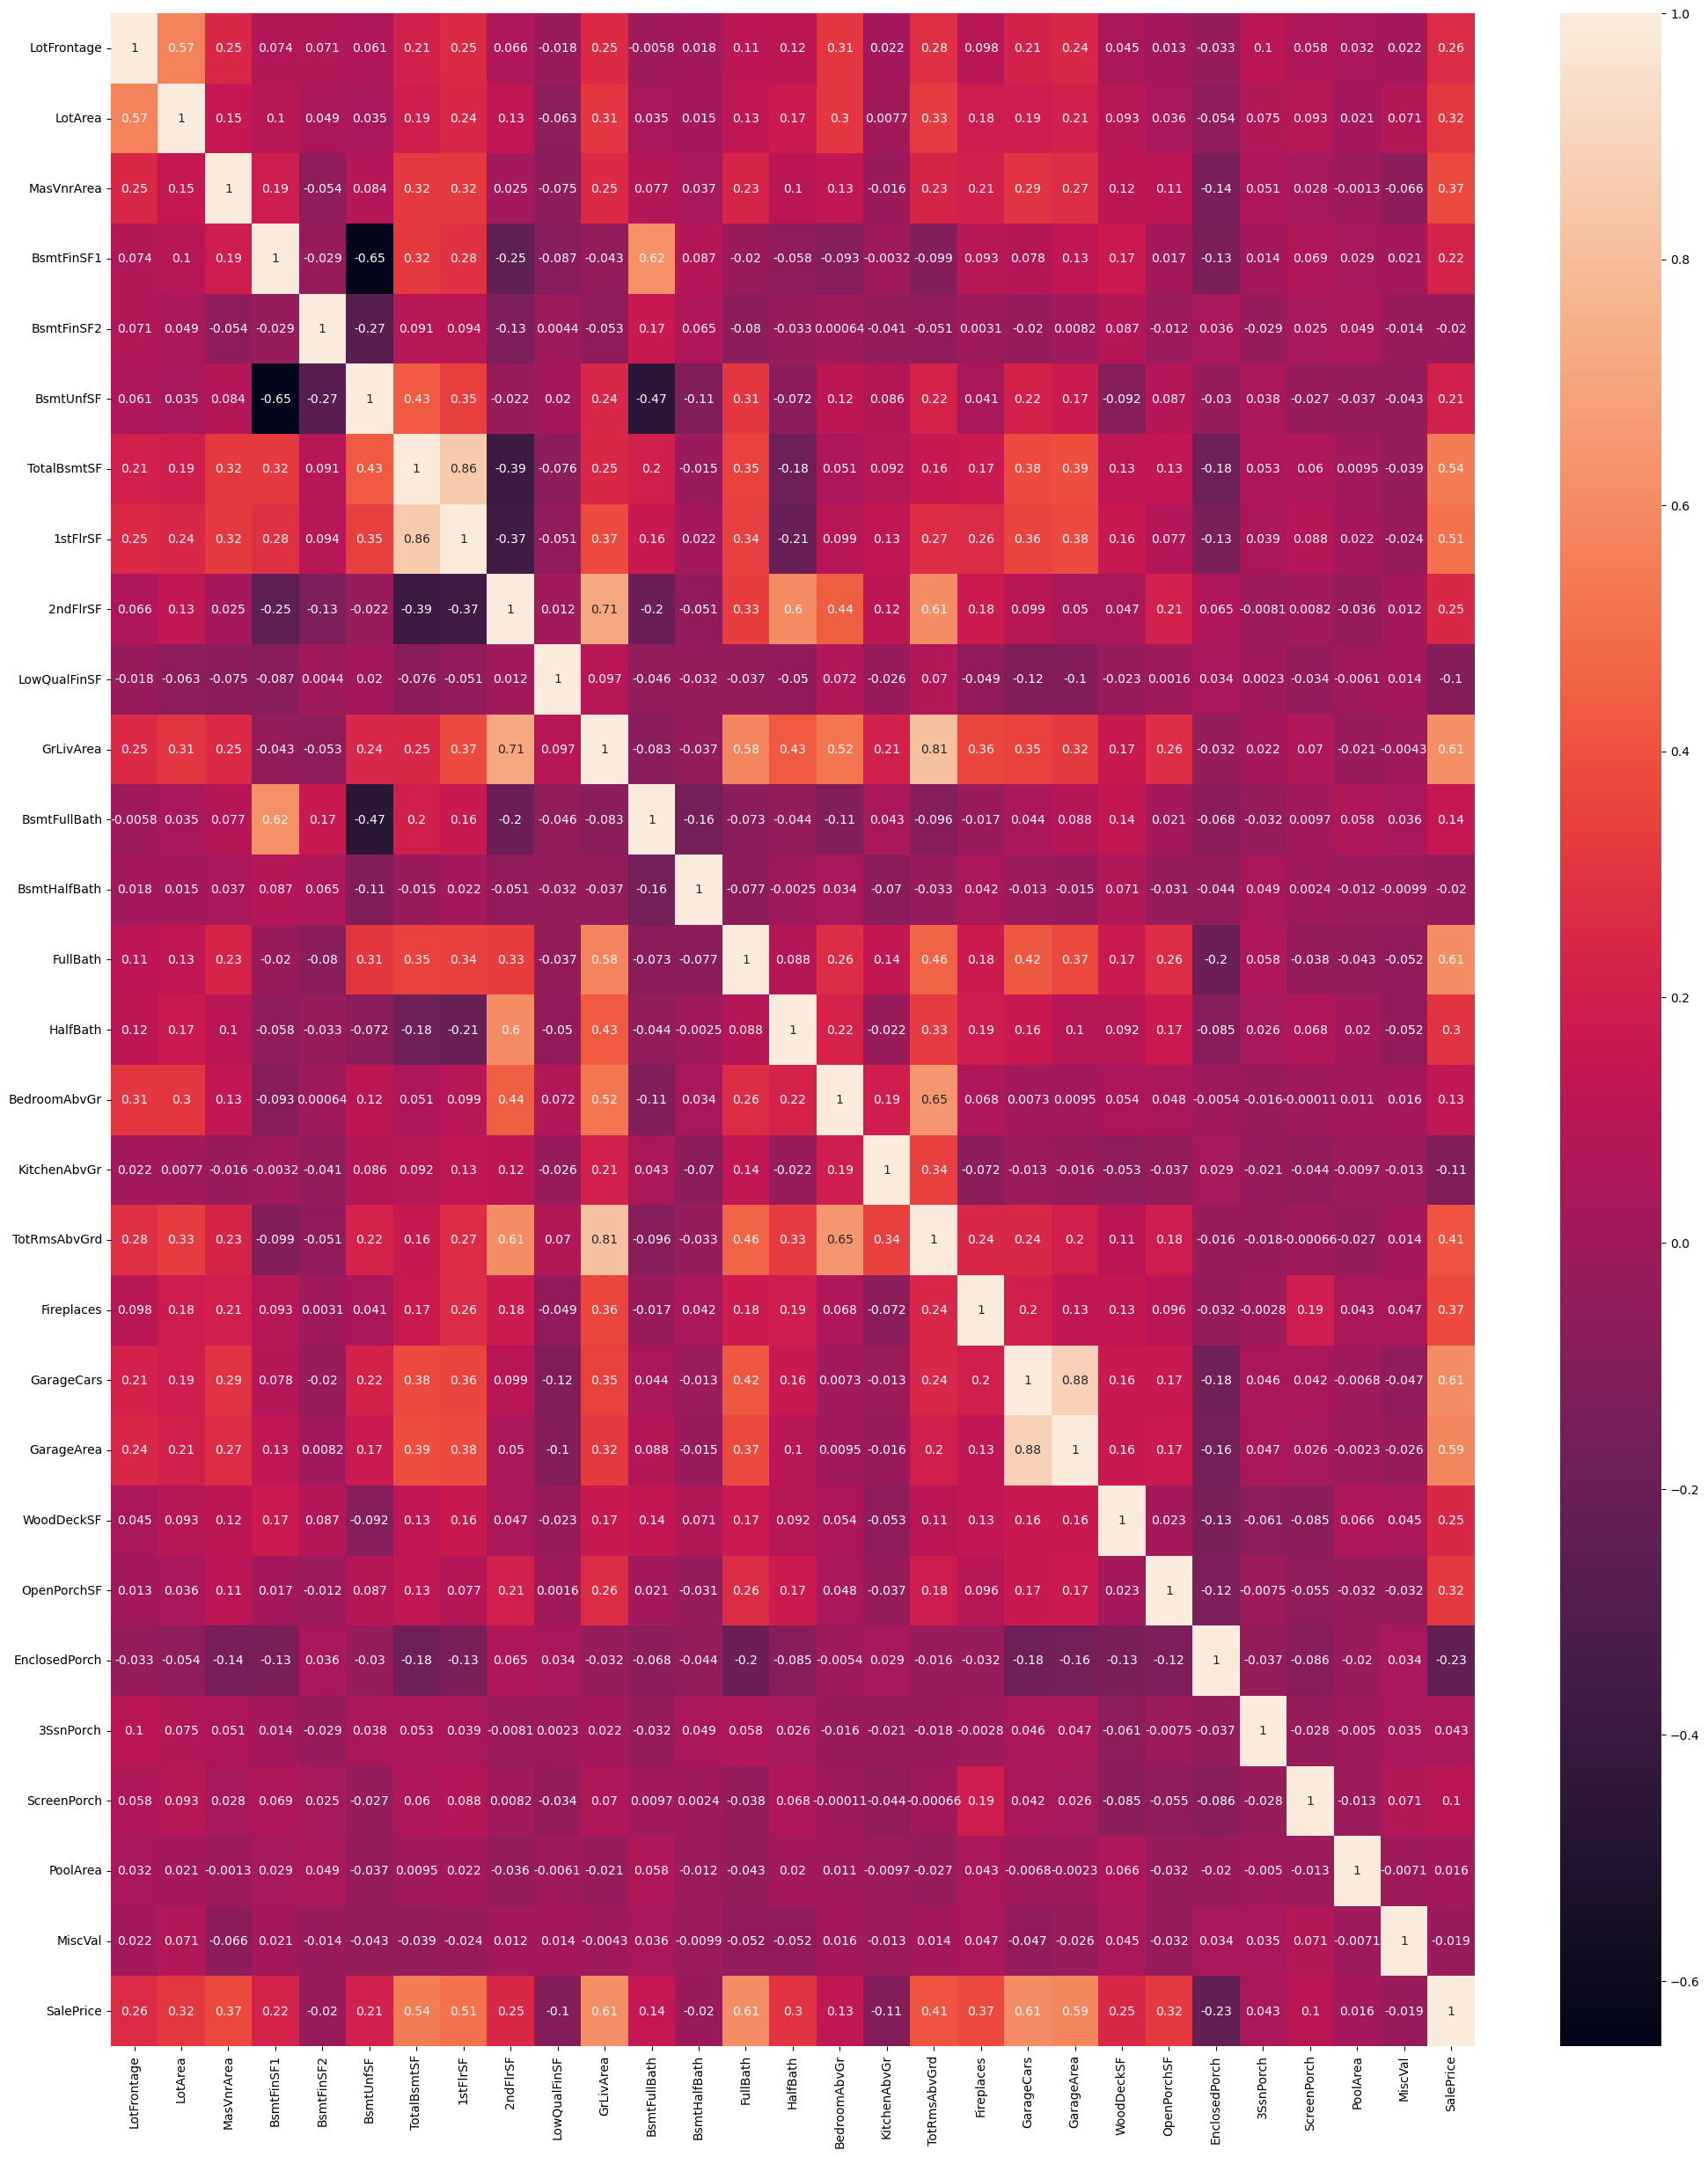

In [32]:
plt.figure(figsize=(25,30))
sns.heatmap(data=df_house[numeric_columns[0]].corr(), annot=True)
plt.show()

In [33]:
# Drop the variables correlate SalePrice variable which are negative correlation values
df_house.drop(columns=['LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal'], inplace=True)

# Filter Numeric vs Categorical Columns again
numeric_columns = [df_house.select_dtypes(exclude='object').columns]
categorical_columns = [df_house.select_dtypes(include='object').columns]
print("categorical columns length: " + str(len(categorical_columns[0])))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns[0])))
print(numeric_columns)

categorical columns length: 48
[Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')]
numeric columns length: 23
[Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRms

Visualising Categorical Variables

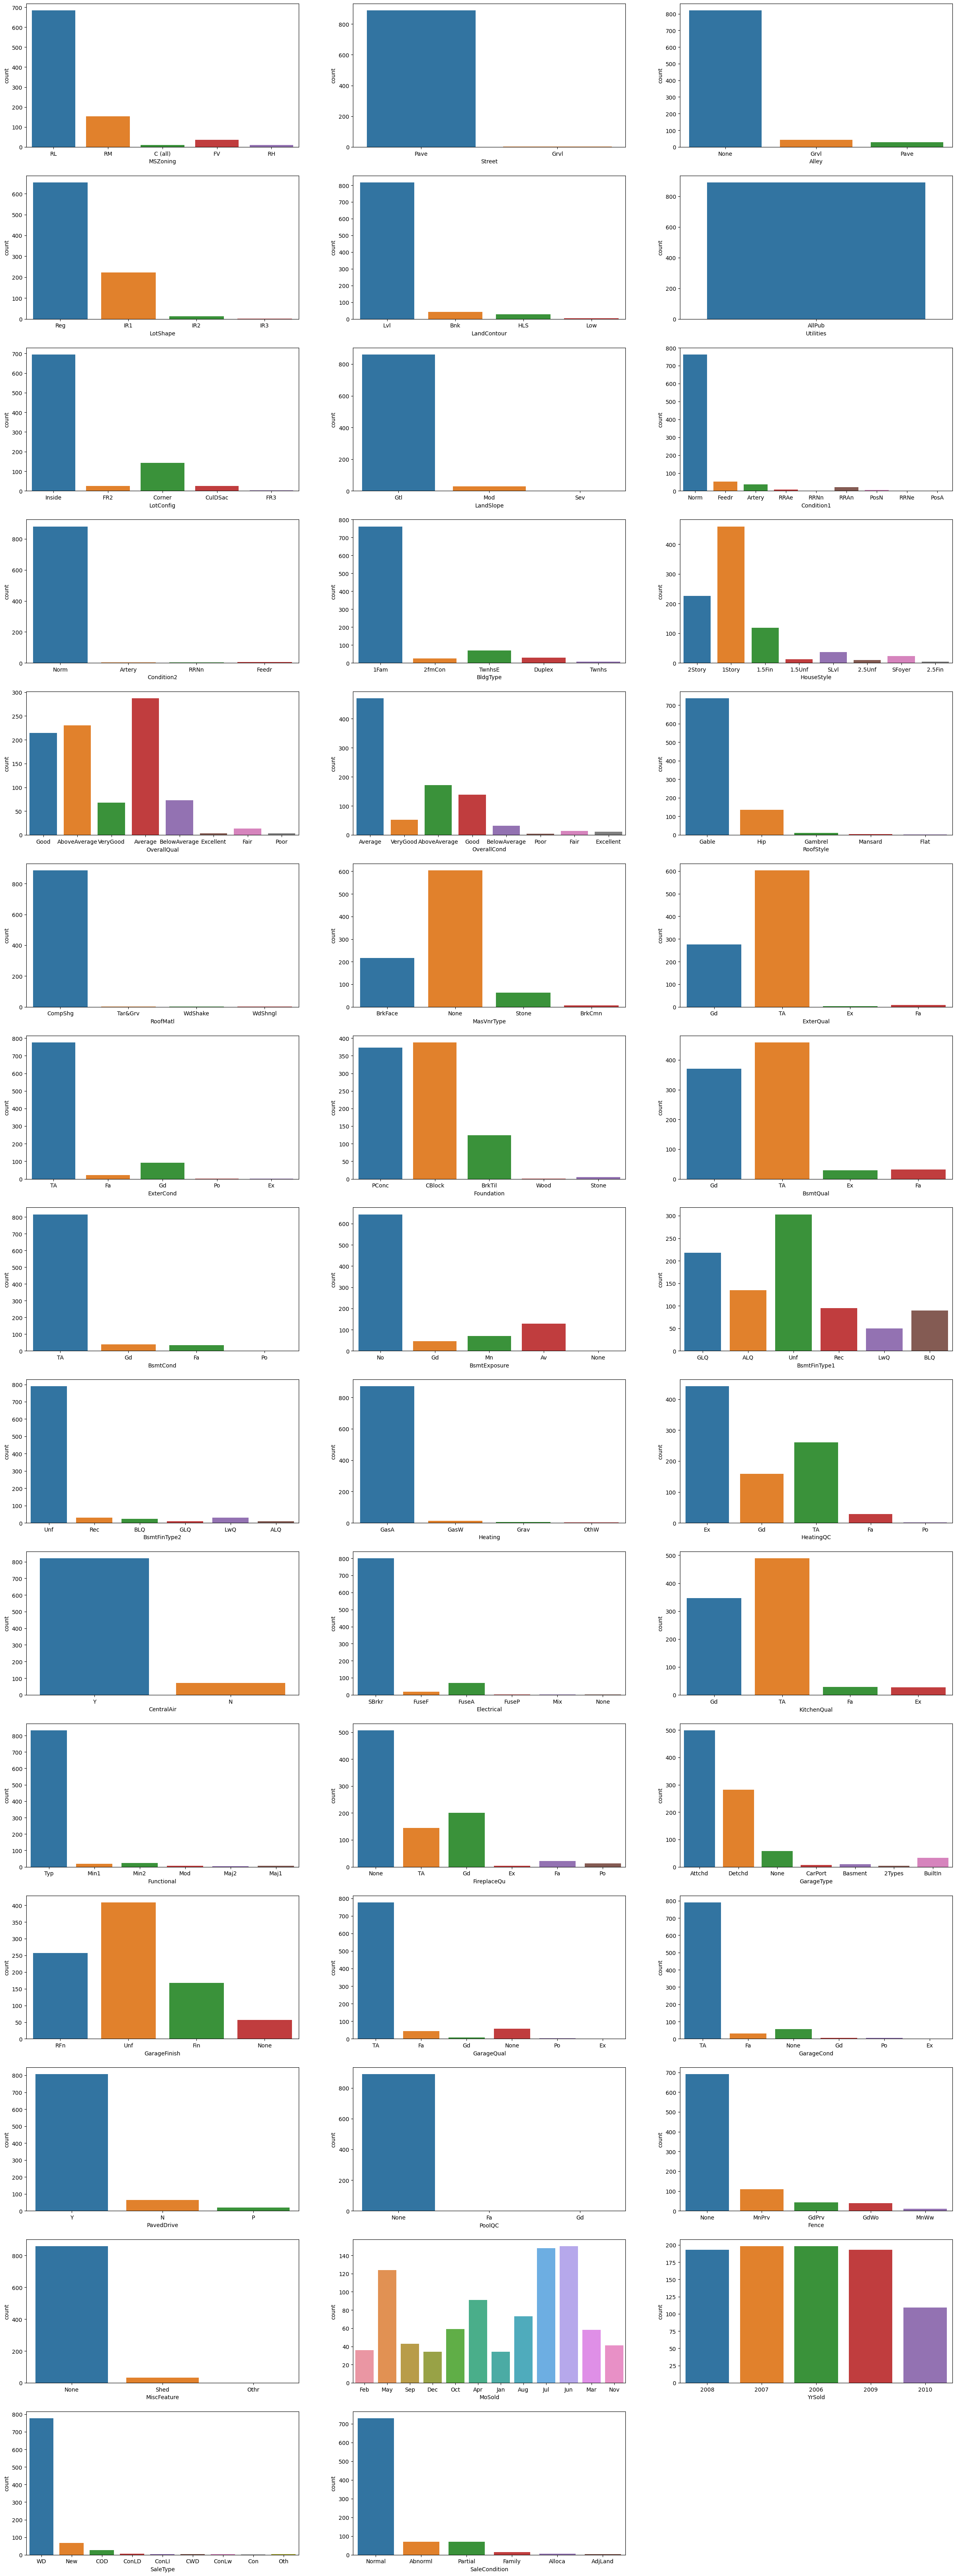

In [34]:
plt.figure(figsize = (30, 100))
ind = 1
for col in categorical_columns[0]:
    if df_house[col].nunique() <= 12:
        plt.subplot(18,3,ind)
        ind += 1
        sns.countplot(data=df_house, x=col)
plt.show()

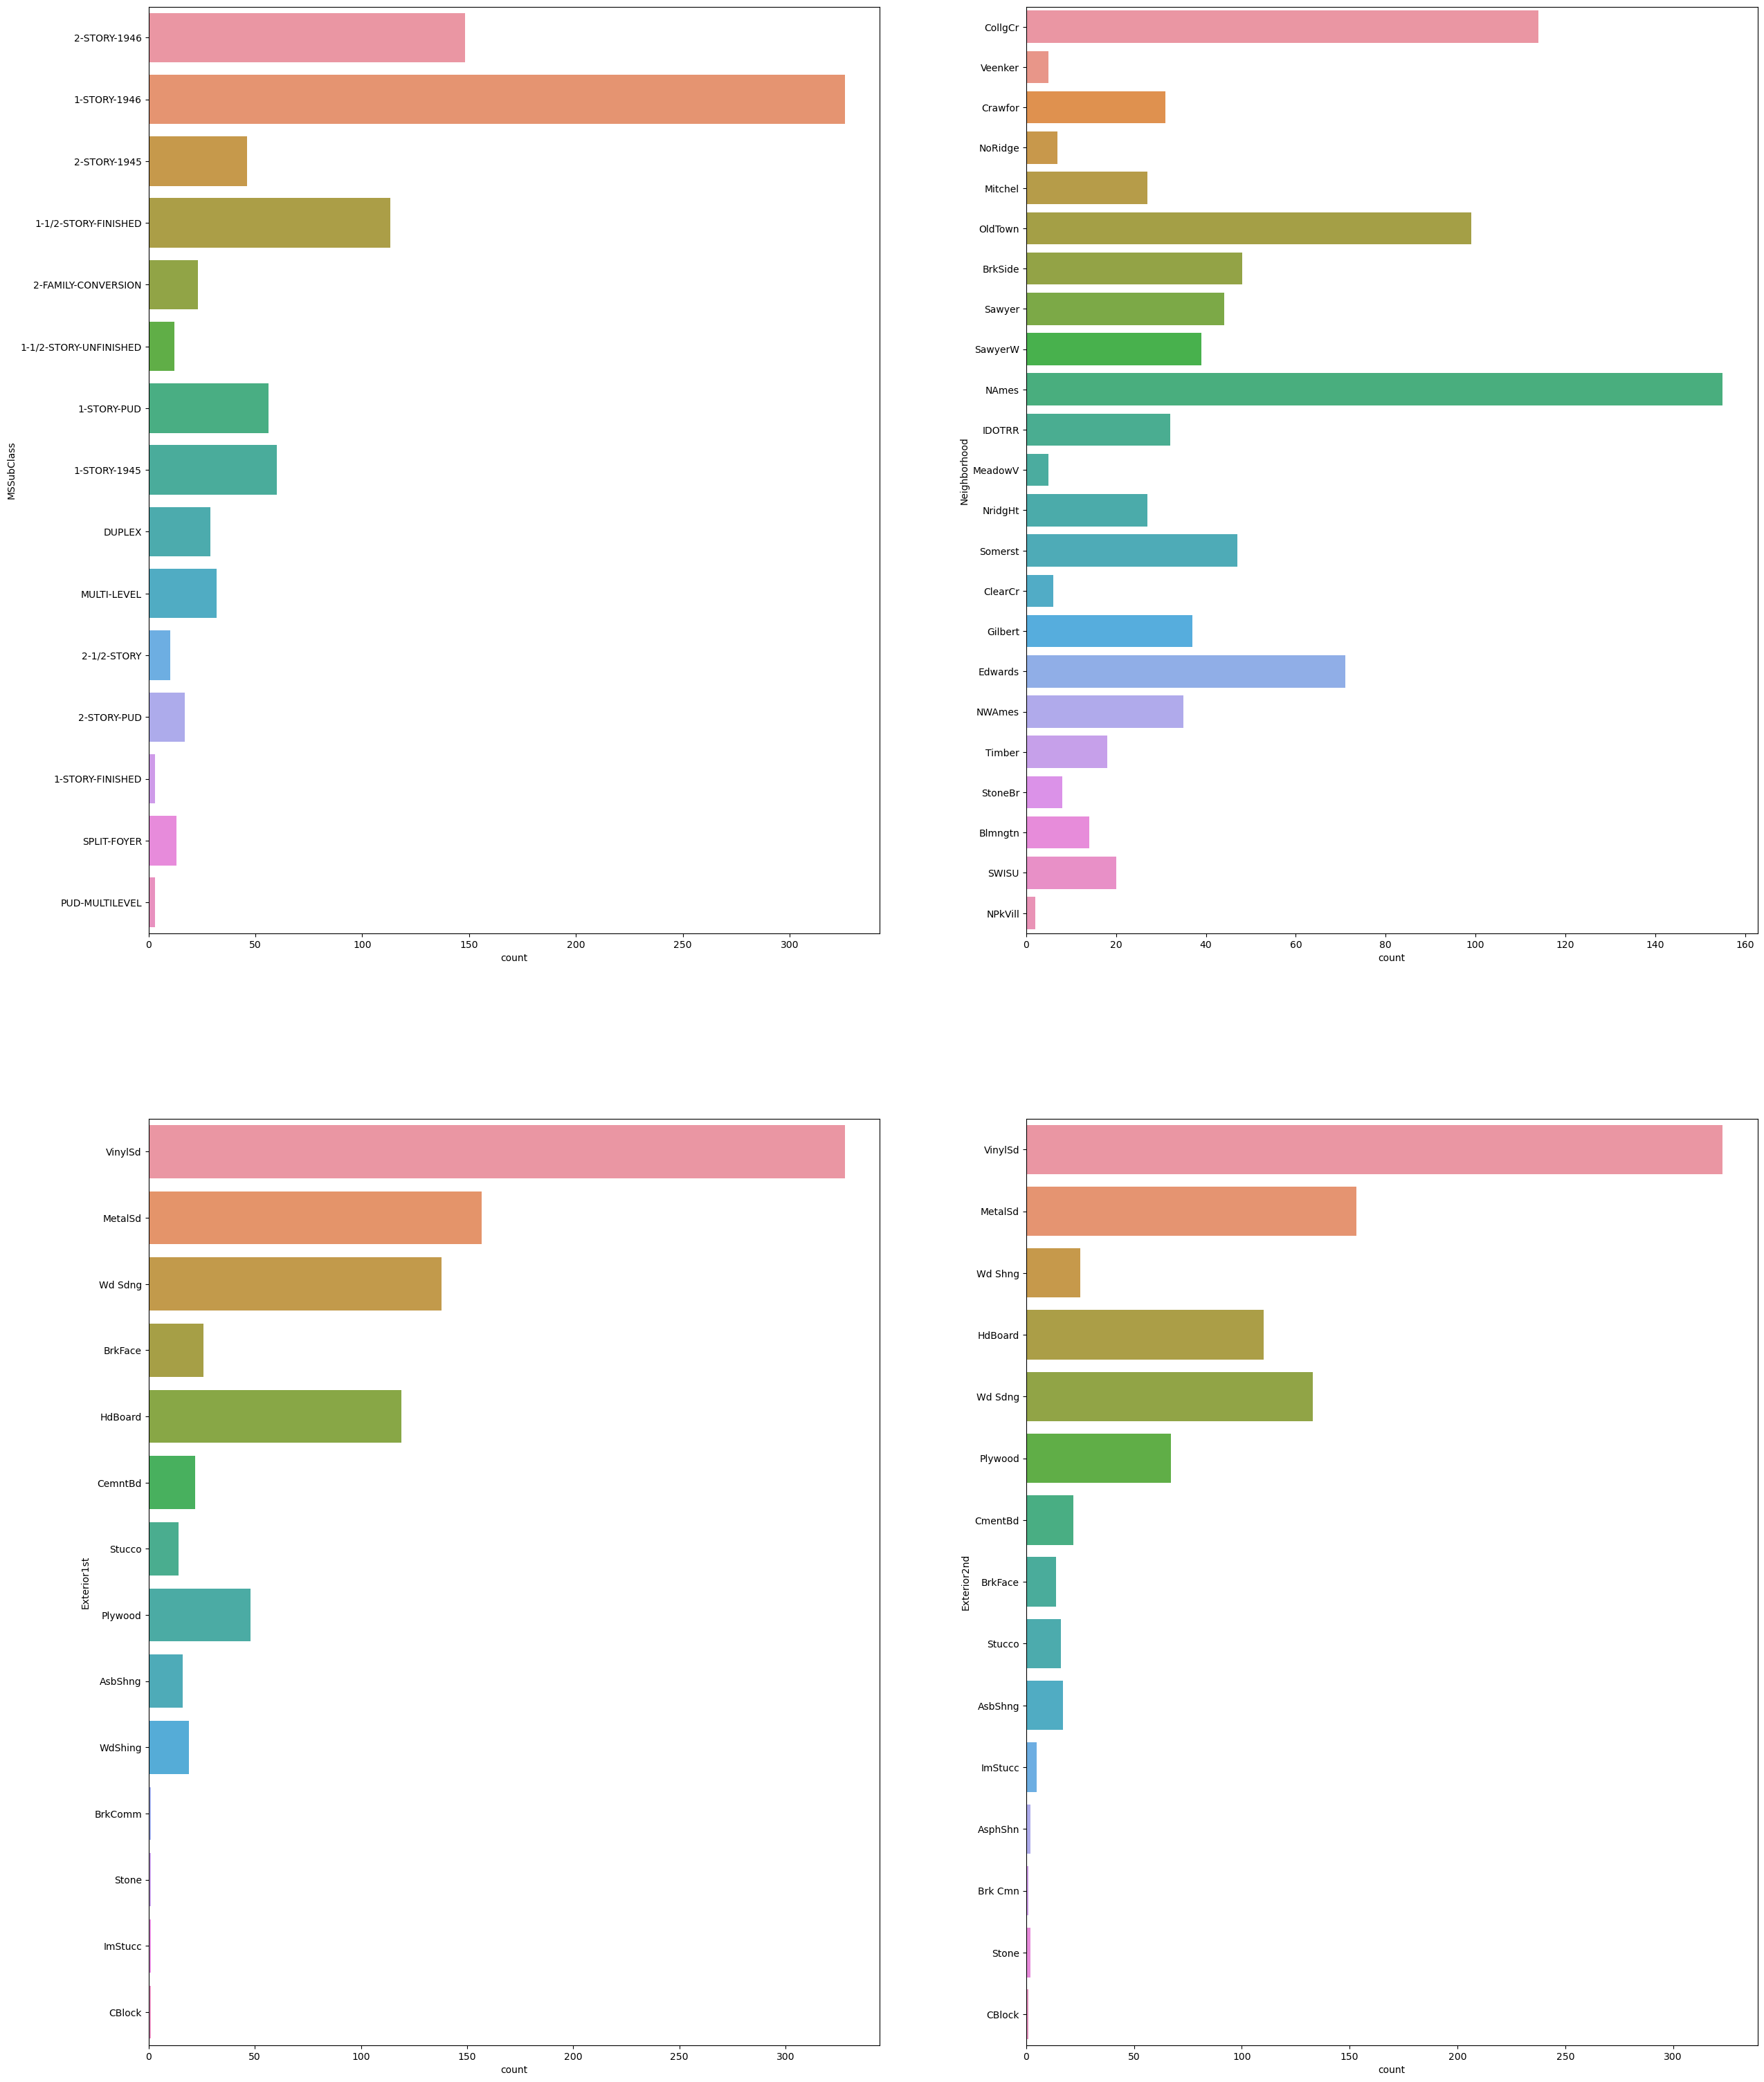

In [35]:
plt.figure(figsize = (30, 80))
ind = 1
for col in categorical_columns[0]:
    if df_house[col].nunique() > 12:
        plt.subplot(4,2,ind)
        ind += 1
        sns.countplot(data=df_house, y=col)
plt.show()

In [36]:
df_house[categorical_columns[0]].describe()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
count            891      891    891   891      891         891       891   
unique            15        5      2     3        4           4         1   
top     1-STORY-1946       RL   Pave  None      Reg         Lvl    AllPub   
freq             326      684    888   820      654         817       891   

       LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
count        891       891          891        891        891      891   
unique         5         3           23          9          4        5   
top       Inside       Gtl        NAmes       Norm       Norm     1Fam   
freq         695       861          155        763        881      762   

       HouseStyle OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
count         891         891         891       891      891         891   
unique          8           8           8         5        4          14   
top        1Story     Average     Average     Gable  CompShg     VinylSd   
freq          460         287         470       737      886         328   

       Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
count          891        891       891       891        891      891   
unique          15          4         4         5          5        4   
top        VinylSd       None        TA        TA     CBlock       TA   
freq           323        604       603       776        388      459   

       BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
count       891          891          891          891     891       891   
unique        4            5            6            6       4         5   
top          TA           No          Unf          Unf    GasA        Ex   
freq        816          644          303          789     871       442   

       CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
count         891        891         891        891         891        891   
unique          2          6           4          6           6          7   
top             Y      SBrkr          TA        Typ        None     Attchd   
freq          820        800         489        832         507        499   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
count           891        891        891        891    891   891         891   
unique            4          6          6          3      3     5           3   
top             Unf         TA         TA          Y   None  None        None   
freq            409        777        791        806    889   690         858   

       MoSold YrSold SaleType SaleCondition  
count     891    891      891           891  
unique     12      5        9             6  
top       Jun   2007       WD        Normal  
freq      150    198      777           729

In [37]:
# Drop Utilities column
df_house.drop(columns='Utilities', inplace=True)

In [38]:
# Filter Numeric vs Categorical Columns again
numeric_columns = [df_house.select_dtypes(exclude='object').columns]
categorical_columns = [df_house.select_dtypes(include='object').columns]
print("categorical columns length: " + str(len(categorical_columns[0])))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns[0])))
print(numeric_columns)

categorical columns length: 47
[Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')]
numeric columns length: 23
[Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fir

As above plots, we see that results:

- `MSZoning`: RL (Residential Low Density) is the most sales.
- `Street`: Pave (Paved) is the most sales.
- `Alley`: None (No alley access) is the most sales.
- `LandContour`: Lvl (Near Flat/Level) is the most sales.
- `LandSlope`: Gtl (Gentle slope) is the most sales.
- `Condition1` and `Condition2`: Norm (Normal) is the most sales.
- `BldgType`: 1Fam (Single-family Detached) is the most sales.
- `RoofStyle`: Gable is the most sales.
- `RoofMatl`: CompShg (Standard (Composite) Shingle) is the most sales.
- `ExterCond`: TA (Average/Typical) is the most sales.
- `BsmtCond`: TA (Average/Typical) is the most sales.
- `BsmtFinType2`: Unf (Unfinshed) is the most sales.
- `Heating`: GasA (Gas forced warm air furnace) is the most sales.
- `CentralAir`: Yes is the most sales.
- `Electrical`: SBrkr (Standard Circuit Breakers & Romex) is the most sales.
- `Functional`: Typ (Typical Functionality) is the most sales.
- `GarageQual`: TA (Average/Typical) is the most sales.
- `GarageCond`: TA (Average/Typical) is the most sales.
- `PavedDrive`: Yes is the most sales.
- `PoolQC`: None (No Pool) is the most sales.
- `MiscFeature`: None is the most sales.
- `SaleType`: WD (Warranty Deed - Conventional) is the most sales.
- `SaleCondition`: Normal (Normal Sale) is the most sales.
- `Utilities`: there is only one unique value and all houses in data set is AllPub. We can drop this column because it is not significant variable

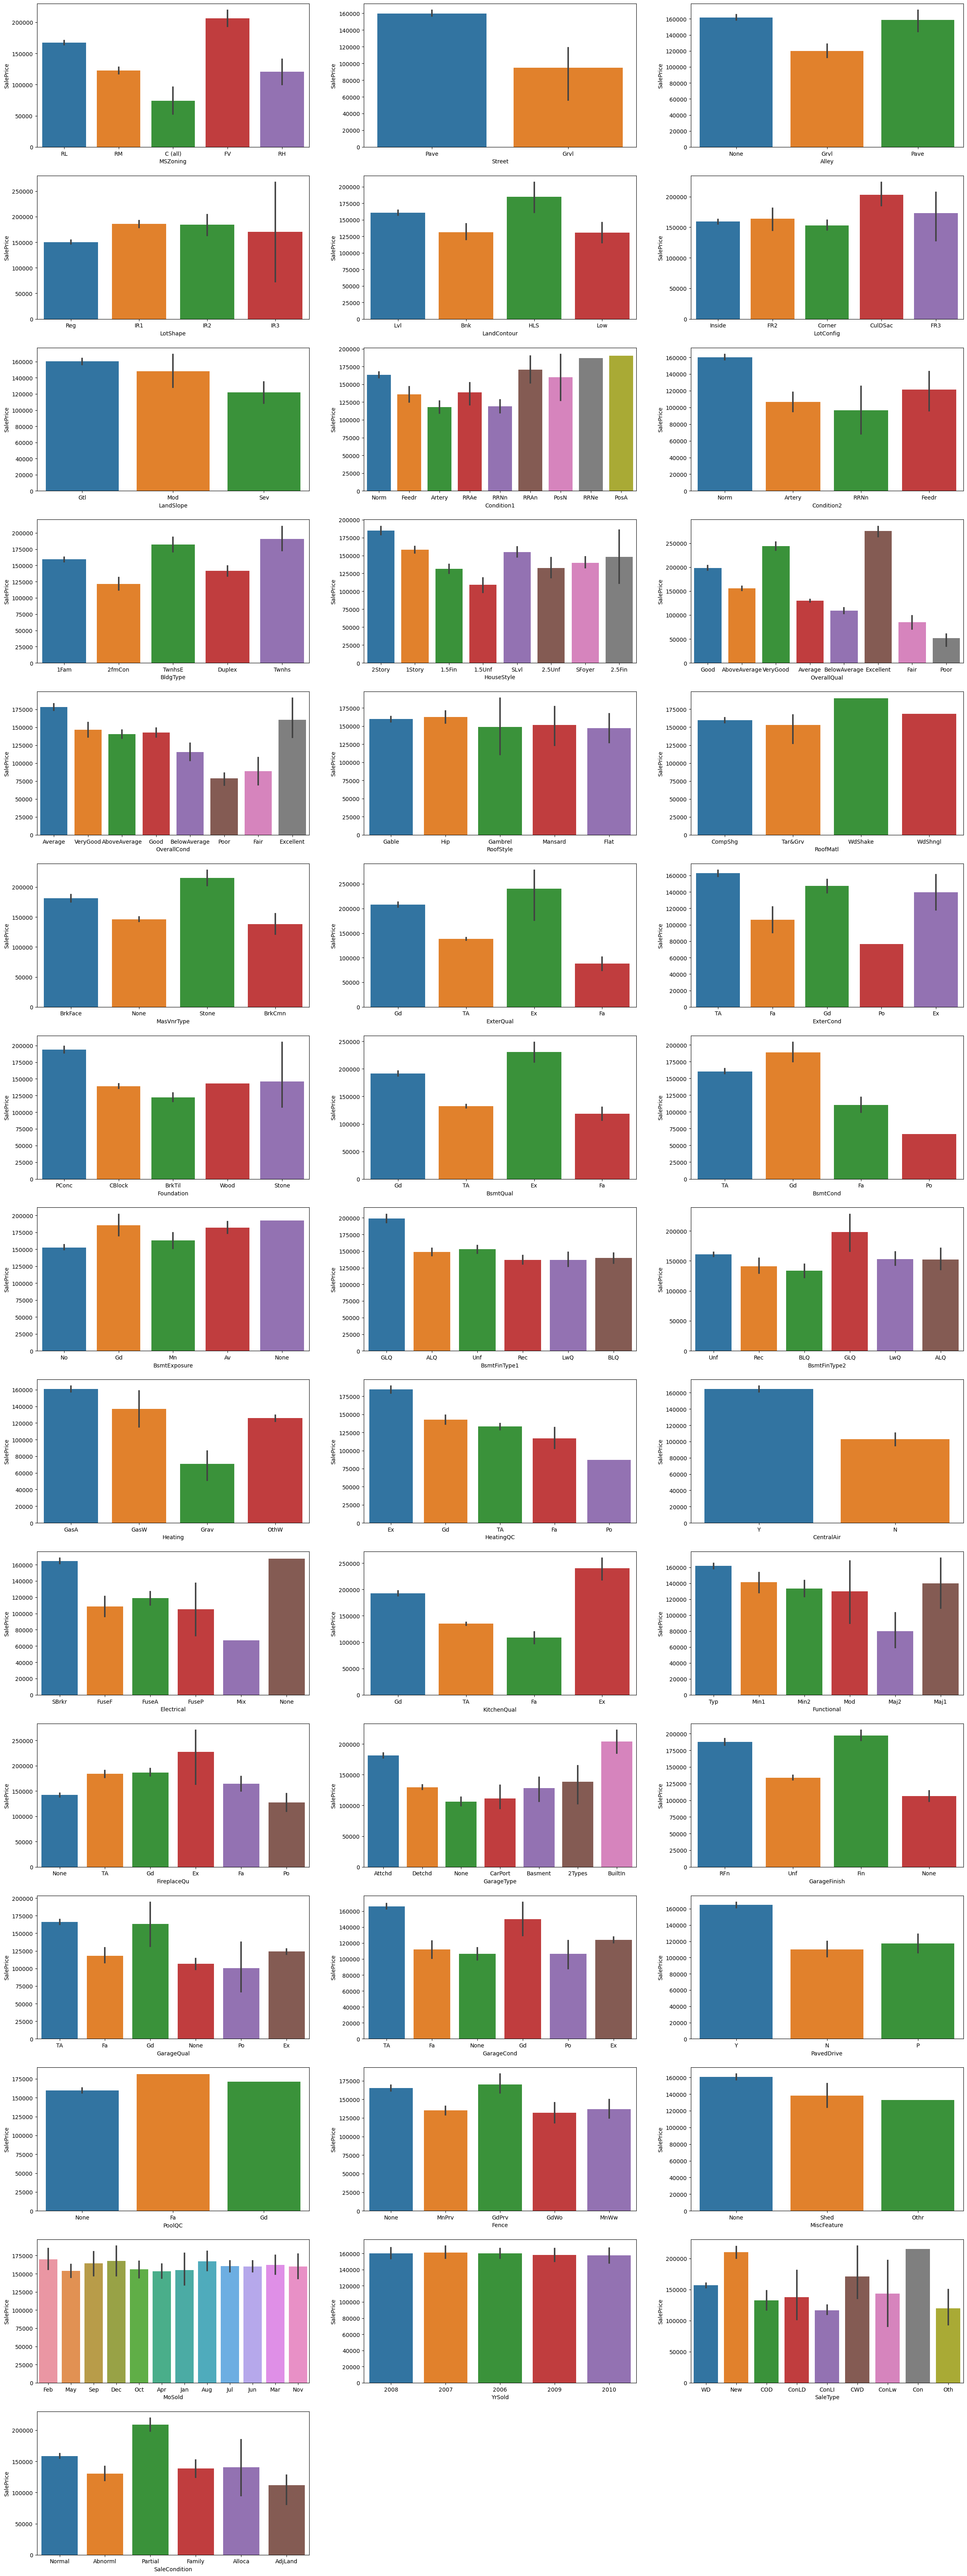

In [39]:
plt.figure(figsize = (30, 100))
ind = 1
for col in categorical_columns[0]:
    if df_house[col].nunique() <= 12:
        plt.subplot(18,3,ind)
        ind += 1
        sns.barplot(data=df_house, x=col, y='SalePrice')
plt.show()

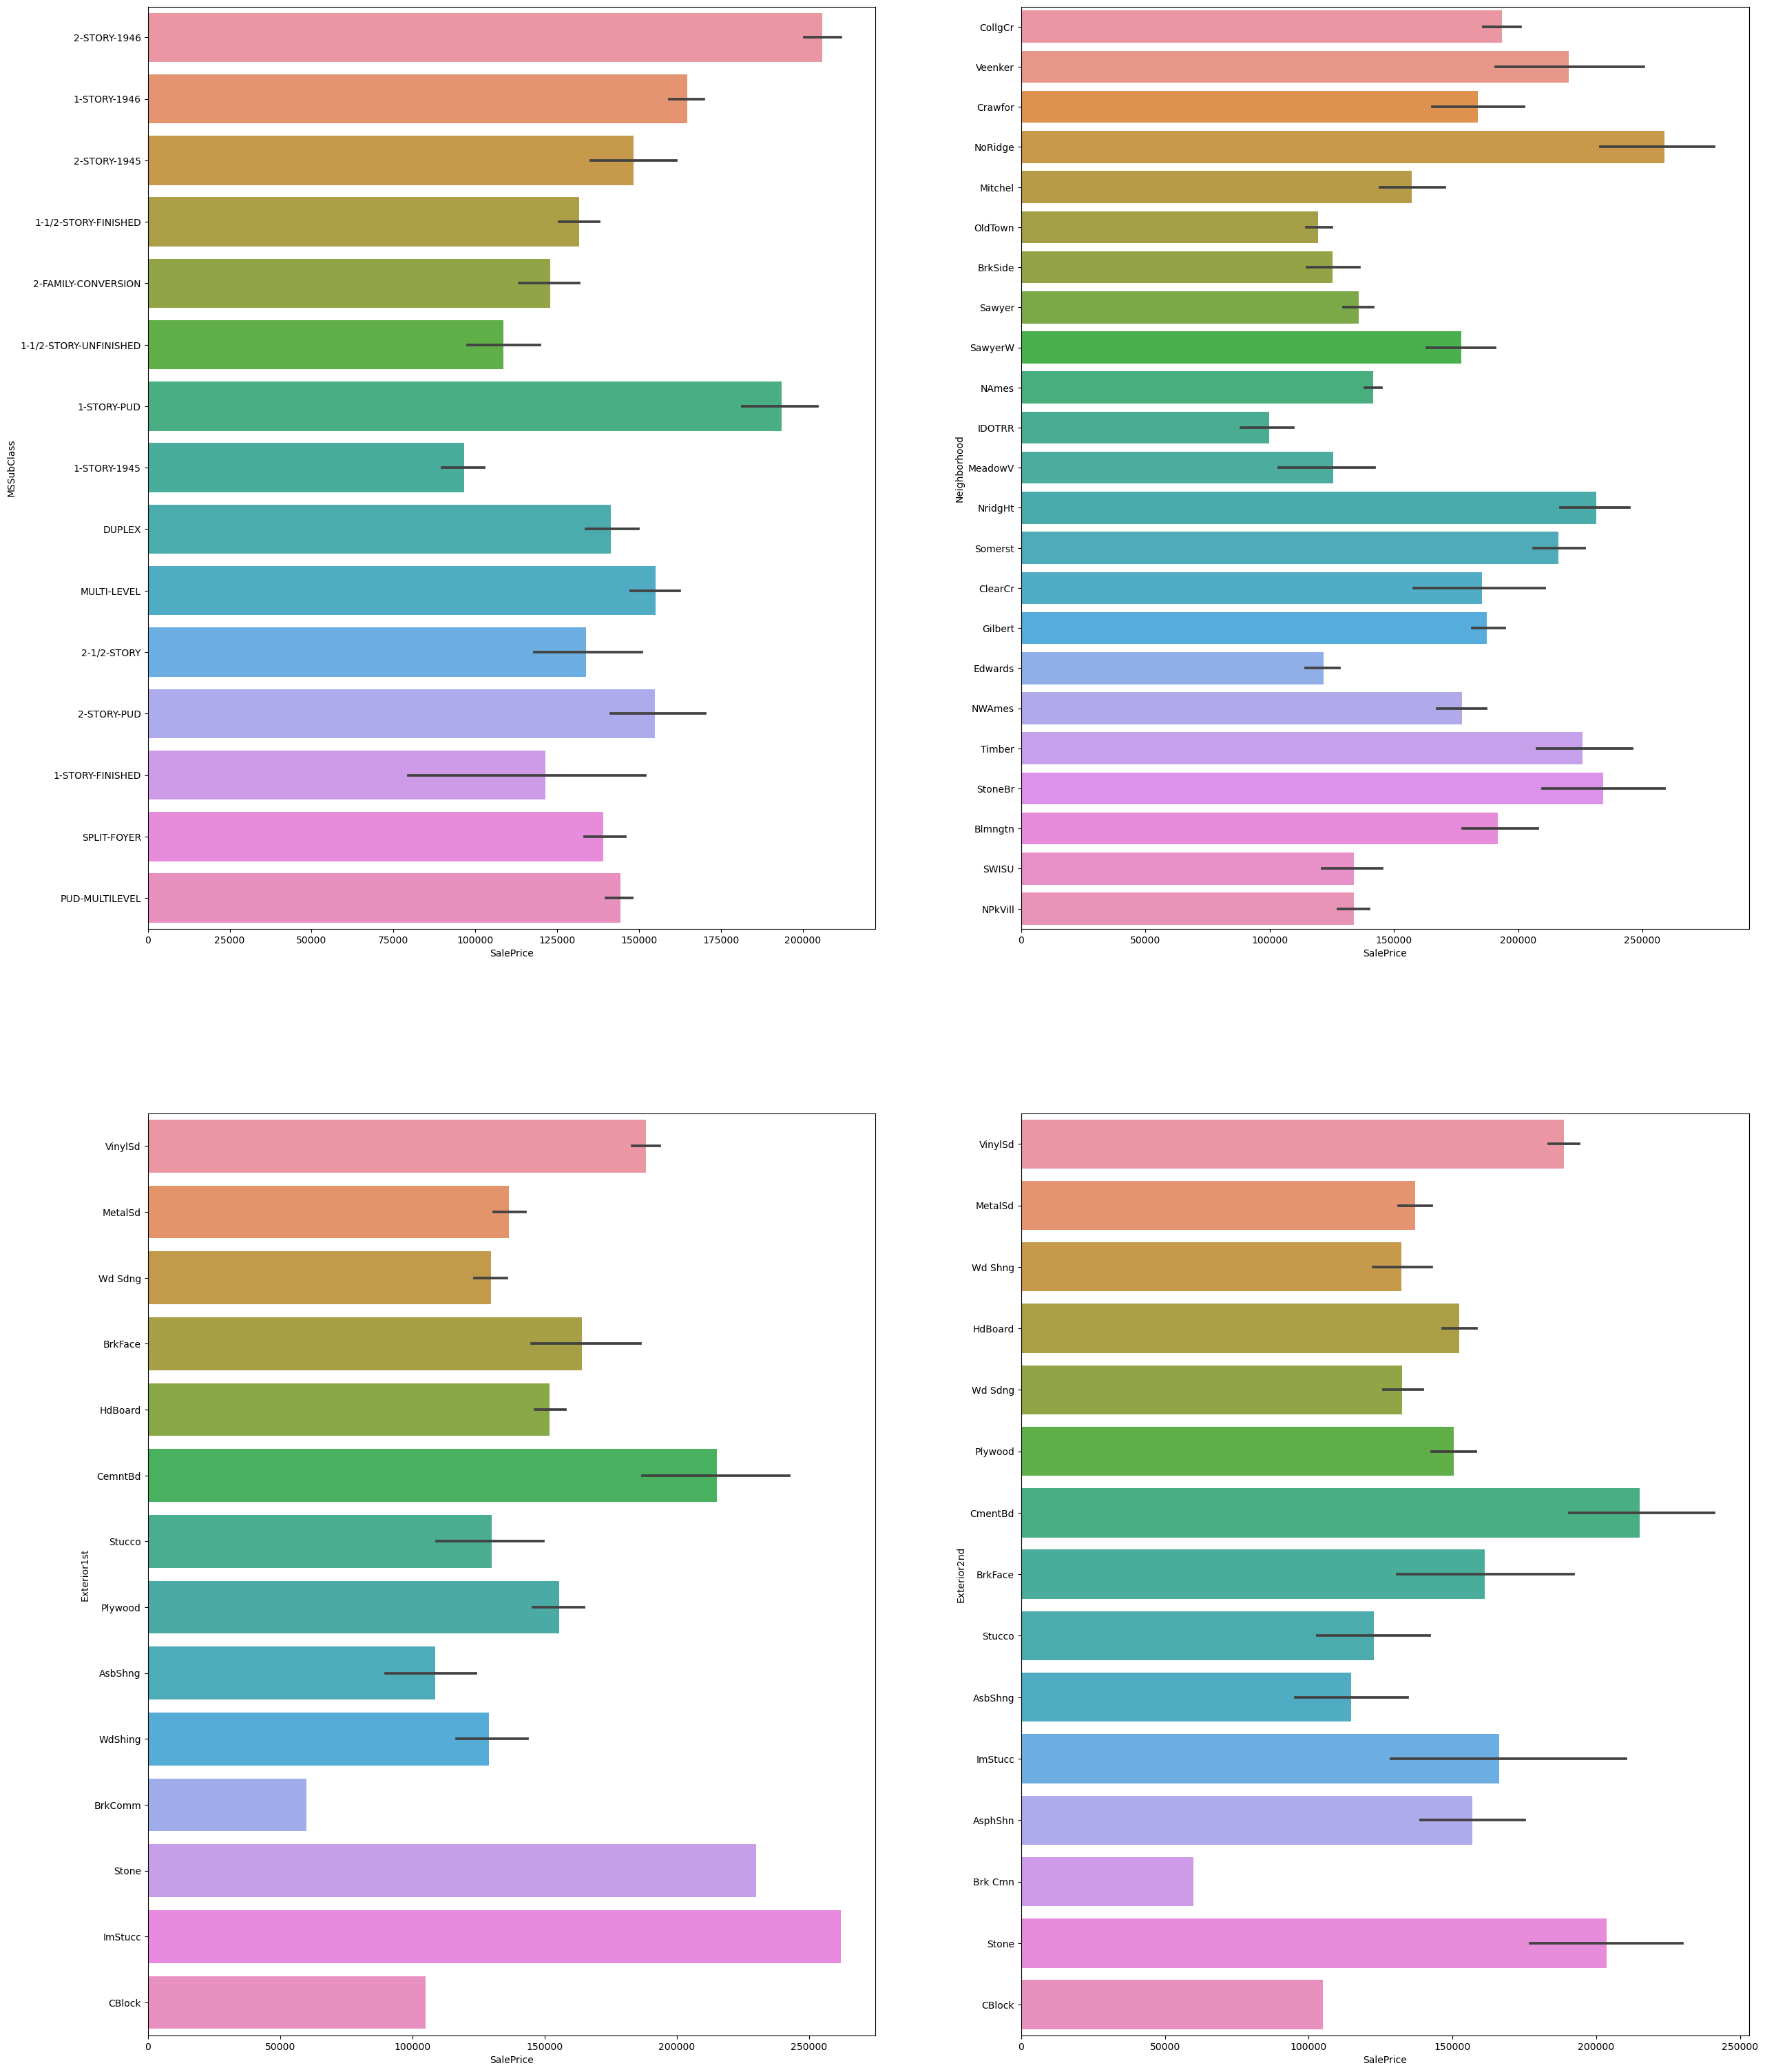

In [40]:
plt.figure(figsize = (30, 80))
ind = 1
for col in categorical_columns[0]:
    if df_house[col].nunique() > 12:
        plt.subplot(4,2,ind)
        ind += 1
        sns.barplot(data=df_house, y=col, x='SalePrice')
plt.show()

As plots above, we see that all categorical variables correlated with SalePrice variable

Conclusion: the dependent variable is SalePrice column

#### Create dummy variables

In [41]:
df_updated_data = pd.get_dummies(data=df_house, columns=categorical_columns[0], drop_first=True)

# checking the data frame after adding dummy data
df_updated_data.shape

(891, 265)

In [42]:
# Print the first 5 rows
df_updated_data.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450       196.0         706        150          856   
1         80.0     9600         0.0         978        284         1262   
2         68.0    11250       162.0         486        434          920   
3         60.0     9550         0.0         216        540          756   
4         84.0    14260       350.0         655        490         1145   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             3             8           0           2         548           0   
1             3             6           1           2         460         298   
2             3             6           1           2         608           0   
3             3             7           1           3         642           0   
4             4             9           1           3         836         192   

   OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
0           61          0            0         0     208500   
1            0          0            0         0     181500   
2           42          0            0         0     223500   
3           35          0            0         0     140000   
4           84          0            0         0     250000   

   MSSubClass_1-1/2-STORY-UNFINISHED  MSSubClass_1-STORY-1945  \
0                                  0                        0   
1                                  0                        0   
2                                  0                        0   
3                                  0                        0   
4                                  0                        0   

   MSSubClass_1-STORY-1946  MSSubClass_1-STORY-FINISHED  \
0                        0                            0   
1                        1                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   MSSubClass_1-STORY-PUD  MSSubClass_2-1/2-STORY  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   MSSubClass_2-FAMILY-CONVERSION  MSSubClass_2-STORY-1945  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        1   
4                               0                        0   

   MSSubClass_2-STORY-1946  MSSubClass_2-STORY-PUD  MSSubClass_DUPLEX  \
0                        1                       0                  0   
1                        0                       0                  0   
2                        1                       0                  0   
3                        0                       0                  0   
4                        1                       0                  0   

   MSSubClass_MULTI-LEVEL  MSSubClass_PUD-MULTILEVEL  MSSubClass_SPLIT-FOYER  \
0                       0                          0                       0   
1                       0                          0                       0   
2                       0                          0                       0   
3                       0                          0                

In [43]:
#Print all the columns and their data types
print(df_updated_data.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 1459
Data columns (total 265 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    LotFrontage                        891 non-null    float64
 1    LotArea                            891 non-null    int64  
 2    MasVnrArea                         891 non-null    float64
 3    BsmtFinSF1                         891 non-null    int64  
 4    BsmtUnfSF                          891 non-null    int64  
 5    TotalBsmtSF                        891 non-null    int64  
 6    1stFlrSF                           891 non-null    int64  
 7    2ndFlrSF                           891 non-null    int64  
 8    GrLivArea                          891 non-null    int64  
 9    BsmtFullBath                       891 non-null    int64  
 10   FullBath                           891 non-null    int64  
 11   HalfBath                           891 non

In [44]:
df_updated_data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice                            1.000000
ExterQual_Gd                         0.650610
GrLivArea                            0.614623
FullBath                             0.610471
GarageCars                           0.609747
GarageArea                           0.586215
Foundation_PConc                     0.583331
BsmtQual_Gd                          0.542874
TotalBsmtSF                          0.542414
KitchenQual_Gd                       0.527451
1stFlrSF                             0.506747
GarageType_Attchd                    0.490613
OverallQual_VeryGood                 0.488604
BsmtFinType1_GLQ                     0.452993
Exterior2nd_VinylSd                  0.439792
Exterior1st_VinylSd                  0.439414
OverallQual_Good                     0.438674
MSSubClass_2-STORY-1946              0.416586
TotRmsAbvGrd                         0.408140
OverallCond_Average                  0.400906
Fireplaces                           0.374161
MasVnrArea                        

In [45]:
top_most_5_predictors = df_updated_data.corr()['SalePrice'].sort_values(ascending=False).index[1:6]

### Splitting the Data into Training and Testing Sets

In [46]:
df_train, df_test = train_test_split(df_updated_data, train_size=0.7,test_size=0.3,random_state=100)
print("Train dataset:")
print("No. of rows = ", df_train.shape[0], "and no. of columns = ", df_train.shape[1])
print("Test dataset:")
print("No. of rows = ", df_test.shape[0], "and no. of columns = ", df_test.shape[1])

Train dataset:
No. of rows =  623 and no. of columns =  265
Test dataset:
No. of rows =  268 and no. of columns =  265


### Rescaling feature

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = numeric_columns[0]

df_train[num_vars] = scaler.fit_transform(X=df_train[num_vars])

In [49]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [50]:
df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
117         0.550  0.436727    0.000000    0.000000   0.589932     0.566038   
140         0.500  0.578829    0.000000    0.268991   0.226534     0.421199   
1306        0.225  0.322336    0.256831    0.000000   0.717357     0.700888   
266         0.500  0.629983    0.000000    0.444583   0.046146     0.386792   
1340        0.500  0.419217    0.000000    0.000000   0.449921     0.417869   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
117   0.451677  0.000000   0.324516           0.0  0.333333       0.5   
140   0.280079  0.000000   0.201228           0.0  0.333333       0.0   
1306  0.611440  0.000000   0.439301           0.0  0.666667       0.0   
266   0.239316  0.525574   0.506849           0.5  0.666667       0.5   
1340  0.285339  0.000000   0.205007           0.0  0.333333       0.0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
117       0.333333      0.222222    0.000000         0.5    0.450734   
140       0.500000      0.222222    0.333333         0.0    0.000000   
1306      0.333333      0.333333    0.333333         0.5    0.496855   
266       0.500000      0.555556    0.333333         0.5    0.432914   
1340      0.500000      0.222222    0.000000         1.0    0.503145   

      WoodDeckSF  OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  \
117     0.108696     0.122371        0.0          0.0       0.0   
140     0.000000     0.000000        0.0          0.0       0.0   
1306    0.179348     0.066922        0.0          0.0       0.0   
266     0.129076     0.143403        0.0          0.0       0.0   
1340    0.000000     0.000000        0.0          0.0       0.0   

      MSSubClass_1-1/2-STORY-UNFINISHED  MSSubClass_1-STORY-1945  \
117                                   0                        0   
140                                   0                        0   
1306                                  0                        0   
266                                   0                        0   
1340                                  0                        0   

      MSSubClass_1-STORY-1946  MSSubClass_1-STORY-FINISHED  \
117                         1                            0   
140                         1                            0   
1306                        0                            0   
266                         0                            0   
1340                        1                            0   

      MSSubClass_1-STORY-PUD  MSSubClass_2-1/2-STORY  \
117                        0                       0   
140                        0                       0   
1306                       1                       0   
266                        0                       0   
1340                       0                       0   

      MSSubClass_2-FAMILY-CONVERSION  MSSubClass_2-STORY-1945  \
117                                0                        0   
140                                0                        0   
1306                               0                        0   
266                                0                        0   
1340                               0                        0   

      MSSubClass_2-STORY-1946  MSSubClass_2-STORY-PUD  MSSubClass_DUPLEX  \
117                         0                       0                  0   
140                         0                       0                  0   
1306                        0                       0                  0   
266                         1                       0                  0   
1340                        0                       0                  0   

      MSSubClass_MULTI-LEVEL  MSSubClass_PUD-MULTILEVEL  \
117                        0                          0   
140                        0                          0   
1306                       0                          0   
266                        0                         

In [51]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [52]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [53]:
df_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
345        0.4375  0.284712     0.00000    0.000000   0.509701     0.481132   
72         0.5500  0.552854     0.10929    0.000000   0.436287     0.403441   
1349       0.2500  0.198973     0.00000    0.161270   0.222863     0.321310   
754        0.3875  0.392880     0.00000    0.273350   0.060304     0.511099   
1307       0.3750  0.403155     0.00000    0.464508   0.127950     0.491121   

      1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
345   0.351085  0.448480   0.538026           0.0  0.333333       0.0   
72    0.293886  0.617494   0.604629           0.0  0.666667       0.5   
1349  0.328731  0.900667   0.906944           0.0  0.666667       0.0   
754   0.386588  0.000000   0.277752           0.5  0.333333       0.0   
1307  0.362919  0.000000   0.260746           0.5  0.333333       0.0   

      BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
345       0.500000      0.333333    0.333333        0.25    0.327044   
72        0.500000      0.444444    0.333333        0.50    0.447589   
1349      0.666667      0.555556    0.000000        0.00    0.000000   
754       0.500000      0.222222    0.000000        0.50    0.461216   
1307      0.500000      0.222222    0.000000        0.50    0.503145   

      WoodDeckSF  OpenPorchSF  3SsnPorch  ScreenPorch  PoolArea  \
345     0.000000     0.000000        0.0     0.000000       0.0   
72      0.000000     0.179732        0.0     0.755844       0.0   
1349    0.000000     0.103250        0.0     0.000000       0.0   
754     0.232337     0.091778        0.0     0.000000       0.0   
1307    0.000000     0.122371        0.0     0.000000       0.0   

      MSSubClass_1-1/2-STORY-UNFINISHED  MSSubClass_1-STORY-1945  \
345                                   0                        0   
72                                    0                        0   
1349                                  0                        0   
754                                   0                        0   
1307                                  0                        0   

      MSSubClass_1-STORY-1946  MSSubClass_1-STORY-FINISHED  \
345                         0                            0   
72                          0                            0   
1349                        0                            0   
754                         1                            0   
1307                        1                            0   

      MSSubClass_1-STORY-PUD  MSSubClass_2-1/2-STORY  \
345                        0                       0   
72                         0                       0   
1349                       0                       0   
754                        0                       0   
1307                       0                       0   

      MSSubClass_2-FAMILY-CONVERSION  MSSubClass_2-STORY-1945  \
345                                0                        0   
72                                 0                        0   
1349                               0                        1   
754                                0                        0   
1307                               0                        0   

      MSSubClass_2-STORY-1946  MSSubClass_2-STORY-PUD  MSSubClass_DUPLEX  \
345                         0                       0                  0   
72                          1                       0                  0   
1349                        0                       0                  0   
754                         0                       0                  0   
1307                        0                       0                  0   

      MSSubClass_MULTI-LEVEL  MSSubClass_PUD-MULTILEVEL  \
345                        0                          0   
72                         0                          0   
1349                       0                          0   
754                        0                         

### Model Building and Evaluation

#### Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [54]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [56]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9522668971491625
-1.5452990467264322e+21
1.0540261248482596
1.6827028253671093e+22
0.0016918557381191968
6.278741885698169e+19


### Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

#### Ridge Regression

In [57]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [58]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

3.0


In [60]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.0241269   0.06520485  0.0397372   0.06310977  0.01263402  0.09267424
  0.10455665  0.06291134  0.10794256  0.02800802  0.05391289  0.04389222
 -0.02069594  0.01402585  0.01309975  0.04183891  0.05333161  0.02187665
  0.0412376  -0.0040199   0.05422824  0.02584618  0.00024679 -0.00850444
  0.01524379  0.00601743  0.00908613 -0.00968366 -0.02943855  0.00915436
  0.03927224 -0.02843742 -0.02214795 -0.01296182  0.0164742  -0.01138934
  0.02471224 -0.00455189  0.0378847   0.02200632  0.00403716  0.00381615
 -0.00143362 -0.00693049  0.00740572 -0.00088278  0.0026182  -0.0016176
 -0.00054308  0.0136542  -0.02001623 -0.0046651  -0.00039303  0.01417047
  0.00070467  0.01534408 -0.00191324 -0.00433219  0.06344069 -0.0368984
 -0.01793614 -0.02233509 -0.05518878 -0.00401355 -0.01618933 -0.00479942
 -0.01988598 -0.01380395  0.03983589 -0.01859786 -0.01333744 -0.00424615
 -0.00048735  0.07138176  0.02099807  0.01422345  0.02278487  0.00703783
  0.03602738 -0.00260996  0.0110984  -0.01501606  0.0

In [61]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9414174486898748
0.886887411380417
1.2935999516748837
1.2317025164673843
0.0020764044168136175
0.004595904912191732


#### Lasso

In [62]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

0.0001


In [64]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [65]:
lasso.coef_

array([ 1.14652611e-02,  6.79563865e-02,  3.92017524e-02,  6.39971942e-02,
       -0.00000000e+00,  1.34177401e-01,  8.57937739e-02,  6.29278327e-02,
        1.72647634e-01,  2.52750057e-02,  5.10016002e-02,  4.00932887e-02,
       -3.49677740e-02, -0.00000000e+00,  0.00000000e+00,  4.67983343e-02,
        5.23327530e-02,  3.09283726e-02,  4.72319112e-02, -0.00000000e+00,
        6.08265366e-02,  0.00000000e+00, -0.00000000e+00, -9.22032216e-03,
        7.59582114e-03,  0.00000000e+00,  0.00000000e+00, -9.55306171e-03,
       -5.24992553e-02,  0.00000000e+00,  4.22130882e-02, -1.61303450e-02,
       -4.48747258e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.54390352e-02,  0.00000000e+00,  4.19447069e-02,  3.35592444e-02,
       -0.00000000e+00,  2.49222251e-03, -1.53844472e-03, -0.00000000e+00,
        0.00000000e+00, -6.41806770e-04,  0.00000000e+00, -0.00000000e+00,
       -1.17247600e-03,  9.88774541e-03, -2.03638334e-02, -0.00000000e+00,
       -0.00000000e+00,  

In [66]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9434549026601362
0.8862585817070024
1.2486095868217502
1.2385499514047906
0.002004188742892055
0.0046214550425551885


In [67]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.522669e-01          0.941417          0.943455
1   R2 Score (Test)      -1.545299e+21          0.886887          0.886259
2       RSS (Train)       1.054026e+00          1.293600          1.248610
3        RSS (Test)       1.682703e+22          1.231703          1.238550
4       MSE (Train)       4.113217e-02          0.045568          0.044768
5        MSE (Test)       7.923851e+09          0.067793          0.067981

### Lets observe the changes in the coefficients after regularization

In [68]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=264)

In [69]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\4063381995.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [70]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [71]:
pd.set_option('display.max_rows', None)
betas

Linear     Ridge         Lasso
LotFrontage                        1.912810e-02  0.024127  1.146526e-02
LotArea                            7.188847e-02  0.065205  6.795639e-02
MasVnrArea                         6.180121e-02  0.039737  3.920175e-02
BsmtFinSF1                        -1.624486e-02  0.063110  6.399719e-02
BsmtUnfSF                         -8.602312e-02  0.012634 -0.000000e+00
TotalBsmtSF                        2.154632e-01  0.092674  1.341774e-01
1stFlrSF                           2.944620e-01  0.104557  8.579377e-02
2ndFlrSF                           2.267935e-01  0.062911  6.292783e-02
GrLivArea                         -6.894318e-02  0.107943  1.726476e-01
BsmtFullBath                       3.205445e-02  0.028008  2.527501e-02
FullBath                           5.962934e-02  0.053913  5.100160e-02
HalfBath                           4.729966e-02  0.043892  4.009329e-02
BedroomAbvGr                      -3.092020e-02 -0.020696 -3.496777e-02
TotRmsAbvGrd                      -2.355868e-02  0.014026 -0.000000e+00
Fireplaces                        -1.370363e-02  0.013100  0.000000e+00
GarageCars                         9.415130e-02  0.041839  4.679833e-02
GarageArea                         3.989211e-02  0.053332  5.233275e-02
WoodDeckSF                         2.754928e-02  0.021877  3.092837e-02
OpenPorchSF                        6.430756e-02  0.041238  4.723191e-02
3SsnPorch                          7.565777e-03 -0.004020 -0.000000e+00
ScreenPorch                        5.914263e-02  0.054228  6.082654e-02
PoolArea                          -1.881706e+11  0.025846  0.000000e+00
MSSubClass_1-1/2-STORY-UNFINISHED  4.348588e-02  0.000247 -0.000000e+00
MSSubClass_1-STORY-1945            3.999543e-03 -0.008504 -9.220322e-03
MSSubClass_1-STORY-1946            1.148988e-02  0.015244  7.595821e-03
MSSubClass_1-STORY-FINISHED       -9.008107e+10  0.006017  0.000000e+00
MSSubClass_1-STORY-PUD             1.356876e+11  0.009086  0.000000e+00
MSSubClass_2-1/2-STORY             4.673161e-02 -0.009684 -9.553062e-03
MSSubClass_2-FAMILY-CONVERSION     2.712470e-03 -0.029439 -5.249926e-02
MSSubClass_2-STORY-1945            8.778726e-03  0.009154  0.000000e+00
MSSubClass_2-STORY-1946            4.985007e-02  0.039272  4.221309e-02
MSSubClass_2-STORY-PUD             1.356876e+11 -0.028437 -1.613034e-02
MSSubClass_DUPLEX                 -1.472354e+10 -0.022148 -4.487473e-02
MSSubClass_MULTI-LEVEL            -5.882793e-02 -0.012962 -0.000000e+00
MSSubClass_PUD-MULTILEVEL          1.356876e+11  0.016474  0.000000e+00
MSSubClass_SPLIT-FOYER            -6.136794e-02 -0.011389 -0.000000e+00
MSZoning_FV                        1.391249e-01  0.024712  1.543904e-02
MSZoning_RH                        9.447458e-02 -0.004552  0.000000e+00
MSZoning_RL                        1.463162e-01  0.037885  4.194471e-02
MSZoning_RM                        1.350769e-01  0.022006  3.355924e-02
Street_Pave                       -2.736861e-02  0.004037 -0.000000e+00
Alley_None                         9.312095e-03  0.003816  2.492223e-03
Alley_Pave                        -6.024098e-03 -0.001434 -1.538445e-03
LotShape_IR2                      -2.684076e-02 -0.006930 -0.000000e+00
LotShape_IR3                       2.560469e-02  0.007406  0.000000e+00
LotShape_Reg                      -1.194490e-03 -0.000883 -6.418068e-04
LandContour_HLS                    7.693755e-04  0.002618  0.000000e+00
LandContour_Low                    3.232053e-02 -0.001618 -0.000000e+00
LandContour_Lvl                   -6.684621e-03 -0.000543 -1.172476e-03
LotConfig_CulDSac                  1.183699e-02  0.013654  9.887745e-03
LotConfig_FR2                     -2.854243e-02 -0.020016 -2.036383e-02
LotConfig_FR3                     -2.187499e-02 -0.004665 -0.000000e+00
LotConfig_Inside                   4.873992e-03 -0.000393 -0.000000e+00
LandSlope_Mod                      2.421105e-02  0.014170  6.615077e-03
LandSlope_Sev                      1.760650e-03  0.000705  0.000000e+00
Neighborh

In [72]:
top_most_5_predictors

Index(['ExterQual_Gd', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea'], dtype='object')

In [73]:
# Show top the most 5 predictors
betas['Ridge'].sort_values(ascending=False).head()

GrLivArea               0.107943
1stFlrSF                0.104557
OverallQual_VeryGood    0.094395
TotalBsmtSF             0.092674
Neighborhood_Somerst    0.071382
Name: Ridge, dtype: float64

In [74]:
# Show top the most 5 predictors
betas['Lasso'].sort_values(ascending=False).head()

GrLivArea               0.172648
TotalBsmtSF             0.134177
OverallQual_VeryGood    0.100210
Neighborhood_Somerst    0.088339
1stFlrSF                0.085794
Name: Lasso, dtype: float64

Conclusion: The variables `GrLivArea`, `TotalBsmtSF`, `OverallQual`, `Neighborhood` and `1stFlrSF` are significant in predicting the price of a house.

The Lasso regression is chosen because it helps in reducing the features in the model, and create a simpler final model.

# Problem Statement - Part II

### Ridge and Lasso regression with double alpha

#### Ridge

### Question 1

In [75]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

3.0


In [77]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha'] * 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.02570501  0.06050662  0.03301221  0.05777717  0.01308282  0.0794872
  0.09114617  0.05219599  0.09485703  0.02656011  0.04725151  0.03904703
 -0.01139912  0.02284648  0.0151156   0.03615722  0.05199734  0.01690766
  0.03364818 -0.00140784  0.04617783  0.01579436 -0.00250696 -0.01272828
  0.01447878  0.00265242  0.00922627 -0.00737309 -0.02426577  0.0098463
  0.03397705 -0.02716002 -0.01643941 -0.00848625  0.00951227 -0.00666507
  0.01992506 -0.00805877  0.02850489  0.00847787  0.00655816  0.00446178
  0.00040186 -0.00412195  0.0054718  -0.00271354  0.00374894 -0.00208605
  0.0026785   0.01374201 -0.01591854 -0.0035153  -0.00105675  0.01126161
  0.00012659  0.01597207  0.00059621 -0.0079117   0.05745925 -0.03381434
 -0.02222031 -0.01887882 -0.0394805  -0.00162584 -0.01657304 -0.00269621
 -0.0151889  -0.00962808  0.03596758 -0.01529185 -0.01240788 -0.00646683
 -0.00277873  0.05982252  0.01889577  0.01340823  0.0181248   0.00565933
  0.0325193  -0.00131301  0.00646147 -0.01069354  0.0

In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9334305634214437
0.8867303697012077
1.4699636327747458
1.2334125704395644
0.0023594921874393994
0.00460228571059539


#### Lasso

In [79]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

0.0001


In [81]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha'] * 2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [82]:
lasso.coef_

array([ 9.69095666e-03,  6.64039002e-02,  2.87997073e-02,  6.78158893e-02,
       -0.00000000e+00,  1.35503610e-01,  2.62374041e-02,  2.39937002e-03,
        2.51215135e-01,  2.20820531e-02,  4.16791626e-02,  3.52621436e-02,
       -2.25554429e-02, -0.00000000e+00,  0.00000000e+00,  3.38182266e-02,
        4.97746969e-02,  2.38229921e-02,  3.08224273e-02, -0.00000000e+00,
        5.83976892e-02,  0.00000000e+00, -0.00000000e+00, -1.09373123e-02,
        5.81824325e-03,  0.00000000e+00,  0.00000000e+00, -6.78693525e-03,
       -4.70194046e-02,  0.00000000e+00,  4.19504289e-02, -1.16133113e-02,
       -4.07911410e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.39985585e-02,  5.50435133e-03,
        0.00000000e+00,  5.19981202e-04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -8.56667605e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  8.99558650e-03, -8.22155670e-03, -0.00000000e+00,
       -1.14090917e-03,  

In [83]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9359518557441586
0.889370944527033
1.4142893141614068
1.2046588950301202
0.0022701273100504122
0.00449499587697806


In [84]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric1 = pd.Series(metric4, name = 'Ridge Regression x 2')
ls_metric1 = pd.Series(metric5, name = 'Lasso Regression x 2')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric1, ls_metric1], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)       9.522669e-01          0.941417          0.943455   
1   R2 Score (Test)      -1.545299e+21          0.886887          0.886259   
2       RSS (Train)       1.054026e+00          1.293600          1.248610   
3        RSS (Test)       1.682703e+22          1.231703          1.238550   
4       MSE (Train)       4.113217e-02          0.045568          0.044768   
5        MSE (Test)       7.923851e+09          0.067793          0.067981   

   Ridge Regression x 2  Lasso Regression x 2  
0              0.933431              0.935952  
1              0.886730              0.889371  
2              1.469964              1.414289  
3              1.233413              1.204659  
4              0.048575              0.047646  
5              0.067840              0.067045

In [85]:
betas['Ridge'].sort_values(ascending=False).head()

GrLivArea               0.107943
1stFlrSF                0.104557
OverallQual_VeryGood    0.094395
TotalBsmtSF             0.092674
Neighborhood_Somerst    0.071382
Name: Ridge, dtype: float64

In [86]:
betas['Ridgex2'] = ridge.coef_
betas['Lassox2'] = lasso.coef_
# Show top the most 5 predictors
betas['Ridgex2'].sort_values(ascending=False).head()

GrLivArea               0.094857
OverallQual_VeryGood    0.091672
1stFlrSF                0.091146
TotalBsmtSF             0.079487
LotArea                 0.060507
Name: Ridgex2, dtype: float64

In [87]:
betas['Lasso'].sort_values(ascending=False).head()

GrLivArea               0.172648
TotalBsmtSF             0.134177
OverallQual_VeryGood    0.100210
Neighborhood_Somerst    0.088339
1stFlrSF                0.085794
Name: Lasso, dtype: float64

In [88]:
betas['Lassox2'].sort_values(ascending=False).head(10)

GrLivArea                0.251215
TotalBsmtSF              0.135504
OverallQual_VeryGood     0.110078
Neighborhood_Somerst     0.083862
Neighborhood_Crawfor     0.076486
SaleCondition_Partial    0.069522
BsmtFinSF1               0.067816
LotArea                  0.066404
ScreenPorch              0.058398
OverallQual_Good         0.053793
Name: Lassox2, dtype: float64

### Question 3

In [89]:
# Drop the top 5 variables
df_house.drop(columns=['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'Neighborhood', '1stFlrSF'], inplace=True)

# Filter Numeric vs Categorical Columns again
numeric_columns = [df_house.select_dtypes(exclude='object').columns]
categorical_columns = [df_house.select_dtypes(include='object').columns]
print("categorical columns length: " + str(len(categorical_columns[0])))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns[0])))
print(numeric_columns)

categorical columns length: 45
[Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')]
numeric columns length: 20
[Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', '3Ss

In [90]:
df_updated_data = pd.get_dummies(data=df_house, columns=categorical_columns[0], drop_first=True)

In [91]:
df_train, df_test = train_test_split(df_updated_data, train_size=0.7,test_size=0.3,random_state=100)
print("Train dataset:")
print("No. of rows = ", df_train.shape[0], "and no. of columns = ", df_train.shape[1])
print("Test dataset:")
print("No. of rows = ", df_test.shape[0], "and no. of columns = ", df_test.shape[1])

Train dataset:
No. of rows =  623 and no. of columns =  233
Test dataset:
No. of rows =  268 and no. of columns =  233


In [92]:
# Apply scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = numeric_columns[0]

df_train[num_vars] = scaler.fit_transform(X=df_train[num_vars])

y_train = df_train.pop('SalePrice')
X_train = df_train

In [93]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

0.0001


Lasso(alpha=0.0001)

In [95]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['new_lasso'] = lasso.coef_

C:\Users\Admin\AppData\Local\Temp\ipykernel_13632\4274274417.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [96]:
betas['new_lasso'].sort_values(ascending=False).head()

BsmtFinSF1        0.271323
BsmtUnfSF         0.259007
MSZoning_FV       0.147203
2ndFlrSF          0.144962
SaleType_ConLD    0.107126
Name: new_lasso, dtype: float64